# **AIML Capstone Project - AUTOMATIC TICKET ASSIGNMENT**

**Group** : AIML.O.May20A.Group5B
**Team Members**
1. Akshay Jha
2. Abhishek Kumar
3. Kritika Jajodia
4. Rakesh Pandey 
5. Ambika Vani K
6. Srikanth N R





#Installation and Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

In [3]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

ftfy package is used to fixes Unicode that's broken in the given data set.

In [4]:
pip install ftfy

     |████████████████████████████████| 71kB 5.4MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.1-cp37-none-any.whl size=41573 sha256=633be5530d6cf310180725a14f3e33eae637a27c5e55b327ceb93bee7e2f9c63
  Stored in directory: /root/.cache/pip/wheels/ae/73/c7/9056e14b04919e5c262fe80b54133b1a88d73683d05d7ac65c
Successfully built ftfy


In [5]:
pip install google_trans_new

In [6]:
pip install langdetect

     |████████████████████████████████| 983kB 8.7MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-cp37-none-any.whl size=993223 sha256=ffe3e90adef636be3a8ad38869d82b7475221ee65728cc2cacec2f104f43e9d4
  Stored in directory: /root/.cache/pip/wheels/7e/18/13/038c34057808931c7ddc6c92d3aa015cf1a498df5a70268996
Successfully built langdetect


In [7]:
pip install wordcloud

In [8]:
#pip install autocorrect

In [9]:
import pandas as pd
from ftfy import *
from collections import Counter,OrderedDict
from langdetect import detect
from google_trans_new import google_translator  
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import pyplot
import numpy as np 
import textblob, string, h5py, os, glob, cv2, time, re
#from autocorrect import Speller
import seaborn as sns
plt.style.use('ggplot')
import tensorflow as tf 

from xgboost import XGBClassifier
from gensim.summarization import summarize
from IPython.core.display import display, HTML

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer, TweetTokenizer, word_tokenize 

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn import decomposition, ensemble
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.externals import joblib
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import f1_score,recall_score,precision_score, confusion_matrix, confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier


import keras
import keras.layers as L 
from keras import layers
from keras.layers.embeddings import Embedding
from keras.layers import Dense, Embedding, Activation, \
                         Bidirectional, GlobalMaxPool1D,GRU,Conv1D,MaxPooling1D, Input, \
                         Dropout, Embedding, LSTM, Flatten
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.models import Model, Sequential
from keras.utils import plot_model, to_categorical
from keras.losses import SparseCategoricalCrossentropy 
from keras.optimizers import Adam 

%matplotlib inline

from imblearn.over_sampling import BorderlineSMOTE, SMOTE, ADASYN, SMOTENC, RandomOverSampler
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.under_sampling import (RandomUnderSampler, 
                                    NearMiss, 
                                    InstanceHardnessThreshold,
                                    CondensedNearestNeighbour,
                                    EditedNearestNeighbours,
                                    RepeatedEditedNearestNeighbours,
                                    AllKNN,
                                    NeighbourhoodCleaningRule,
                                    OneSidedSelection,
                                    TomekLinks)

In [10]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Data Analysis and Clean up`



In [11]:
path = '/content/drive/MyDrive/Capstone/input_data.xlsx'
dfOriginal = pd.read_excel(path)

In [12]:
dfOriginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


The excel sheet loaded has 4 columns of ticket details which contains a total of 8500 rows


1.   Short description --> Contains 8492 records, i.e there are around 8 null records.
2.   Description --> Contains 8499 records, i.e there are around 1 null records.
3.   Caller --> Doesn't have any blank data
2.   Assignment group --> Doesn't have any blank data



In [13]:
dfOriginal.describe()

,Short description,Description,Caller,Assignment group
count,8492,8499,8500,8500
unique,7481,7817,2950,74
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,810,3976


* There are around 74 unique 'Assignment group'
* There are around 7482 unique 'Short description'
* There are around 7818 unique 'Description'
* There are around 2950 unique 'Caller'
* Most of the tickets are related to Password reset with 38 times of recurring.
* The caller 'bpctwhsn kzqsbmtp' has raised a maximum incidents of 810
* Majority of the tickets are that of GRP_0 with a count of 3976

In [14]:
dfOriginal.loc[5257,'Short description']

'åˆ\xa0é™¤äº†ä¸€ä¸ªexcel æ–‡æ¡£ï¼Œæ–‡æ¡£åœ°å\x9d€ï¼š\\\\HostName_17\\teams\\business\\c2 qualitycontrol\\c25 quality project\\c251 k100\\weekly layered process audi'

In [15]:
dfOriginal.loc[5257,'Description']

'åˆ\xa0é™¤äº†ä¸€ä¸ªexcel æ–‡æ¡£ï¼Œ"kmfg0042f01r00---lpa countermeasures ï¼ˆfy17 total),æ–‡æ¡£åœ°å\x9d€ï¼š\\\\HostName_17\\teams\\business\\c2 qualitycontrol\\c25 quality project\\c251 k100\\weekly layered process audit\\fy17'

* From the above displayed text it is clear that there are certain cells in which is having bad encoding. This needs to be corrected.
* This can be done using FTFY package.
* We are preforming the data fixing at the initatial stage itself as we want to explore the data set with proper records.

In [16]:
for index, row in dfOriginal.iterrows():
  try:
    row.Description=fix_encoding(row.Description)
    row['Short description']=fix_encoding(row['Short description'])
  except Exception as e:
    print(index)
    print(e)

2604
object of type 'float' has no len()
3383
object of type 'float' has no len()
3906
object of type 'float' has no len()
3910
object of type 'float' has no len()
3915
object of type 'float' has no len()
3921
object of type 'float' has no len()
3924
object of type 'float' has no len()
4341
object of type 'float' has no len()
4395
object of type 'float' has no len()


In [17]:
dfOriginal.loc[5257,'Short description']

'删除了一个excel 文档，文档地址：\\\\HostName_17\\teams\\business\\c2 qualitycontrol\\c25 quality project\\c251 k100\\weekly layered process audi'

In [18]:
dfOriginal.loc[5257,'Description']

'删除了一个excel 文档，"kmfg0042f01r00---lpa countermeasures （fy17 total),文档地址：\\\\HostName_17\\teams\\business\\c2 qualitycontrol\\c25 quality project\\c251 k100\\weekly layered process audit\\fy17'



*   By using FTFY package the bad unicode are corrected, this can be see my above text.
*   From above text it is clear that there are text containing different languages.
*   To identify this we can use language detection.
*   Adding 2 additional columns for checking language in 'Short description' and 'Description'

In [19]:
dfOriginal['Languagereveiw']=''
dfOriginal['LanguageShrtDescrib']=''

In [20]:
lang = []    

for index, row in dfOriginal.iterrows():
  try:
    lang = detect(row.Description)
    row.Languagereveiw = lang
  except Exception as e:
    row.Languagereveiw = "error"
    print(index)
    print(e)

4395
expected string or bytes-like object
6253
No features in text.
6371
No features in text.
7397
No features in text.


There are 4 cells under 'Short description' column which failed to detected.

In [21]:
dfOriginal.groupby(['Languagereveiw']).size()

Languagereveiw
af        257
ca         43
cs          1
cy         12
da         25
de        433
en       7028
error       4
es         50
et         13
fi          6
fr        116
hr          6
id          3
it        136
ja          2
ko         10
lt          3
nl         60
no         61
pl         29
pt         23
ro         17
sk          2
sl         10
so          3
sq         13
sv         59
sw          1
tl          9
tr          1
vi          3
zh-cn      61
dtype: int64

In [22]:
dfOriginal['LanguageShrtDescrib']=''
lang = []    

for index, row in dfOriginal.iterrows():
  try:
    lang = detect(row['Short description'])
    row.LanguageShrtDescrib = lang
  except Exception as e:
    row.LanguageShrtDescrib = "error"
    print(index)
    print(e)

1836
No features in text.
2604
expected string or bytes-like object
2975
No features in text.
3383
expected string or bytes-like object
3906
expected string or bytes-like object
3910
expected string or bytes-like object
3915
expected string or bytes-like object
3921
expected string or bytes-like object
3924
expected string or bytes-like object
4341
expected string or bytes-like object


There are 10 cells under 'Short description' column which failed to detected.

In [23]:
dfOriginal.groupby(['LanguageShrtDescrib']).size()

LanguageShrtDescrib
af        499
ca        102
cs          9
cy         23
da         90
de        398
en       6017
error      10
es         79
et         22
fi         11
fr        246
hr          5
hu          1
id         14
it        266
ko         15
lt          6
lv          3
nl        150
no        165
pl         50
pt         40
ro         48
sk         11
sl         23
so          5
sq         18
sv         86
sw          1
tl         22
tr          2
vi          8
zh-cn      55
dtype: int64

By using Langdect package we are able to find out cellings of 'Short description' and 'Description'. The accuracy of the detection is found to be mixed, as there few text in which it was containing english text but was wrongly identified and also there were exception thrown when detecting

In [24]:
dfOriginal.describe()

,Short description,Description,Caller,Assignment group,Languagereveiw,LanguageShrtDescrib
count,8492,8499,8500,8500,8500,8500
unique,7481,7817,2950,74,33,34
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0,en,en
freq,38,56,810,3976,7028,6017


* Both the 'Short description' and 'Description' contains text in english.

In [25]:
# selecting rows where language details failed in case of Descriptiom
rslt_df = dfOriginal.loc[dfOriginal["Languagereveiw"]=="error"]
rslt_df

,Short description,Description,Caller,Assignment group,Languagereveiw,LanguageShrtDescrib
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0,error,en
6253,in the inbox always show there are several ema...,+86,mqbxwpfn uclrqfxa,GRP_0,error,en
6371,authorization add/delete members,\r\n\r\n,hpmwliog kqtnfvrl,GRP_0,error,en
7397,browser issue :,\r\n,fgejnhux fnkymoht,GRP_0,error,en


From the Description column we can see that the detection failed when there was NAN data or return keys.

```
# This is formatted as code
```



In [26]:
# selecting rows where language details failed in case of Shrot descriptiom
rslt_df1 = dfOriginal.loc[dfOriginal["LanguageShrtDescrib"]=="error"]
rslt_df1

,Short description,Description,Caller,Assignment group,Languagereveiw,LanguageShrtDescrib
1836,bgflmyar.xgufkidq@gmail.com,bgflmyar.xgufkidq@gmail.com wanted to check if...,olckhmvx pcqobjnd,GRP_0,en,error
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34,en,error
2975,???????????????????,\r\n\r\nreceived from: yzbjhmpw.vzrulkog@gmail...,yzbjhmpw vzrulkog,GRP_0,de,error
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0,en,error
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0,en,error
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0,en,error
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0,en,error
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0,en,error
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0,en,error
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0,en,error


From the Short description column we can see that the detection failed when there was NAN data or return keys.

As the data set is having multiple languages text the classification based on all text in english would be better, by doing this we can increase the vocabulary of data set content by converting it into english. For this we are using goofle translator here.

In [27]:
translator = google_translator()  

In [28]:
dfOriginal['EngDescription']=''
dfOriginal['EngShtDescription']=''



*   Adding additional columns for caputured the translated text of 'Short description' and 'Description'.
*   The following code is commented as it takes a long time for execution of around 5hrs with a sleep time of 1 second between each translation.
*   With sleep time less than 1 second the package was through error "TTSError: 429 (Too Many Requests) from TTS API. Probable cause: Unknown" with frequent Google API calls. As a result on the 1st execution we set it upto 1 sec wait time.
*   We are saving the data into excel sheet at steps where there were time taken and we are loading the data next time.





In [29]:
"""
for index, row in dfOriginal.iterrows():
  try:
    translate_text = translator.translate(row.Description,lang_tgt='en') 
    row.EngDescription=translate_text    
    time.sleep(1)
    translate_text = translator.translate(row['Short description'],lang_tgt='en') 
    row.EngShtDescription=translate_text
    time.sleep(1)
    print(index)
  except Exception as e:
    print(index)
    print(e)
"""

"\nfor index, row in dfOriginal.iterrows():\n  try:\n    translate_text = translator.translate(row.Description,lang_tgt='en') \n    row.EngDescription=translate_text    \n    time.sleep(1)\n    translate_text = translator.translate(row['Short description'],lang_tgt='en') \n    row.EngShtDescription=translate_text\n    time.sleep(1)\n    print(index)\n  except Exception as e:\n    print(index)\n    print(e)\n"

In [30]:
#Saving the Translated data set into excel sheet for later user.
"""
# create excel writer object
writer = pd.ExcelWriter('/content/drive/MyDrive/Capstone/EnglishTranslated.xlsx')
# write dataframe to excel
dfOriginal.to_excel(writer)
# save the excel
writer.save()
"""

"\n# create excel writer object\nwriter = pd.ExcelWriter('/content/drive/MyDrive/Capstone/EnglishTranslated.xlsx')\n# write dataframe to excel\ndfOriginal.to_excel(writer)\n# save the excel\nwriter.save()\n"

In [31]:
#Loading the data from the saved excel sheet.
path = '/content/drive/MyDrive/Capstone/EnglishTranslated.xlsx'
dfEngTrans = pd.read_excel(path)

In [32]:
dfEngTrans.head()

,Unnamed: 0,Short description,Description,Caller,Assignment group,Languagereveiw,LanguageShrtDescrib,EngDescription,EngShtDescription
0,0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,en,en,-verified user details.(employee# & manager na...,login issue
1,1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,en,et,received from: hmjdrvpb.komuaywn@gmail.com\r\n...,outlook
2,2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,en,en,received from: eylqgodm.ybqkwiam@gmail.com\r\n...,cant log in to vpn
3,3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,en,en,unable to access hr_tool page,unable to access hr_tool page
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,no,no,skype error,skype error


In [33]:
dfEngTrans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           8500 non-null   int64 
 1   Short description    8492 non-null   object
 2   Description          8496 non-null   object
 3   Caller               8500 non-null   object
 4   Assignment group     8500 non-null   object
 5   Languagereveiw       8500 non-null   object
 6   LanguageShrtDescrib  8500 non-null   object
 7   EngDescription       8496 non-null   object
 8   EngShtDescription    8498 non-null   object
dtypes: int64(1), object(8)
memory usage: 597.8+ KB


In [34]:
dfEngTrans['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [35]:
len(dfEngTrans['Assignment group'].unique())

74

In [36]:
len(dfEngTrans['Short description'].unique())

7482

In [37]:
len(dfEngTrans['EngShtDescription'].unique())

7367

In [38]:
len(dfEngTrans['Description'].unique())

7815

In [39]:
len(dfEngTrans['EngDescription'].unique())

7724

In [40]:
len(dfEngTrans['Caller'].unique())

2950

In [41]:
dfEngTrans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           8500 non-null   int64 
 1   Short description    8492 non-null   object
 2   Description          8496 non-null   object
 3   Caller               8500 non-null   object
 4   Assignment group     8500 non-null   object
 5   Languagereveiw       8500 non-null   object
 6   LanguageShrtDescrib  8500 non-null   object
 7   EngDescription       8496 non-null   object
 8   EngShtDescription    8498 non-null   object
dtypes: int64(1), object(8)
memory usage: 597.8+ KB


In [42]:
dfEngTrans.groupby(['EngDescription','EngShtDescription','Assignment group']).size().count()

7838

In [43]:
dfEngTrans.groupby(['Short description','Description','Assignment group']).size().count()

7900

For the above counts we can see that post translation the row count of 'Description' and 'Short Description' has been reduced individually.



In [44]:
#Printing the columns and thier blank or null count
if dfEngTrans.isnull().values.any():
  print('The given dataset contains null values.')
  print('Following are the column and its null value count')
  for (columnName, columnData) in dfEngTrans.iteritems():
   if dfEngTrans[columnName].isnull().values.any():
     print('    ['+columnName+'] : '+ str(dfEngTrans[columnName].isnull().sum())+'')
   else:
     print('    ['+columnName+'] : 0')
else :
  print('The given dataset does not contain any null values')

The given dataset contains null values.
Following are the column and its null value count
    [Unnamed: 0] : 0
    [Short description] : 8
    [Description] : 4
    [Caller] : 0
    [Assignment group] : 0
    [Languagereveiw] : 0
    [LanguageShrtDescrib] : 0
    [EngDescription] : 4
    [EngShtDescription] : 2


In [45]:
#Fill dataframe cell entries that have null with blank space
dfEngTrans.fillna(value=' ', inplace=True)

In [46]:
def WordCloudPlt(text,title) :
  wordcloud = WordCloud().generate(text)
  # Display the generated image:
  plt.figure(figsize = (15,15))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.title(title)
  plt.show()

In [47]:
def WordClouddf(dataColumn,title) :
  uniontext=' '
  for text in dataColumn.values:
    try:
      for word in text.split():
        uniontext= uniontext + ' ' + word
    except Exception as e:
      print(text)
      print(e)
  WordCloudPlt(uniontext,title)

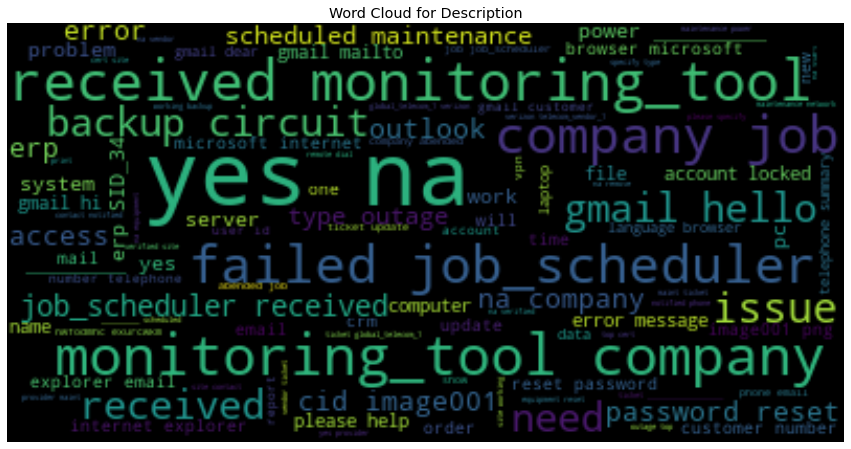

In [48]:
#Displaying the most commonly used words in Description column
WordClouddf(dfEngTrans['EngDescription'],'Word Cloud for Description')

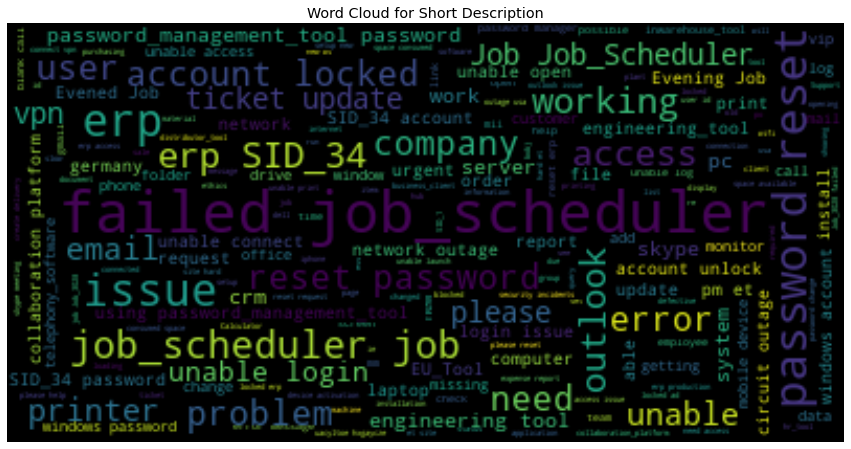

In [49]:
#Displaying the most commonly used words in Short description column
WordClouddf(dfEngTrans['EngShtDescription'],'Word Cloud for Short Description')

In [50]:
if dfEngTrans.isnull().values.any():
  print('The given dataset contains null values.')
  print('Following are the column and its null value count')
  for (columnName, columnData) in dfEngTrans.iteritems():
   if dfEngTrans[columnName].isnull().values.any():
     print('    ['+columnName+'] : '+ str(dfEngTrans[columnName].isnull().sum())+'')
   else:
     print('    ['+columnName+'] : 0')
else :
  print('The given dataset does not contain any null values')

The given dataset does not contain any null values


In [51]:
dfEngTrans.loc[1,'EngDescription']

'received from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind '

Remove the text received from: mail id text as it is irrelevant of the tickets assignment.

In [52]:
dfEngTrans['EngDescription'] = dfEngTrans['EngDescription'].str.replace('received from: \S+@\S+', ' ')
dfEngTrans['EngShtDescription'] = dfEngTrans['EngShtDescription'].str.replace('received from: \S+@\S+', ' ')

In [53]:
dfEngTrans.loc[1,'EngDescription']

' \r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind '

In [54]:
#Removing the return key, tab, next line in the text.
dfEngTrans.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=[" "," "], regex=True, inplace=True)

In [55]:
dfEngTrans.loc[1,'EngDescription']

'     hello team,    my meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?    kind '

In [56]:
dfEngTrans['EngDescription'] = dfEngTrans['EngDescription'].str.lower()
dfEngTrans['EngShtDescription'] = dfEngTrans['EngShtDescription'].str.lower()

In [57]:
dfEngTrans.loc[891,'EngDescription']

'what type of outage:  _____network     ___x__circuit     _____power (please specify what type of outage)    1. top 23 cert site   ?    ____yes_____     (yes/no/na)     2. when did it start  ?   _____ 83.69.48.194 6:26 am et________________    3.  scheduled maintenance ( power) ? ___no____    (yes/no/na)     company power  _________     provider power _________                    4.  scheduled maintenance ( network) ? ____no___    (yes/no/na)     company maint________ (yes/no)       provider maint/ticket #__________________        5. does site have a backup circuit ?  __yes____    (yes/no/na)     6. backup circuit active ?   __yes______     (yes/no/na)     7. site contact notified (phone/email) ?  ____yes_____     (yes/no/na)     8. remote dial-in ?   ___________   (yes/no/na)     9. equipment reset ?    ___________    (yes/no/na)     10. verified site working on backup circuit ?  _______     (yes/no/na)     11. vendor ticket  # ( global_telecom_1, verizon, telecom_vendor_1, telecom_ve

In [58]:
#Removing the punctuation of the text
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans(PUNCT_TO_REMOVE, ' '*len(PUNCT_TO_REMOVE)))    

dfEngTrans['EngDescription']  = dfEngTrans['EngDescription'] .apply(lambda text: remove_punctuation(text))
dfEngTrans['EngShtDescription']  = dfEngTrans['EngShtDescription'] .apply(lambda text: remove_punctuation(text))


In [59]:
dfEngTrans.loc[891,'EngDescription']

'what type of outage        network        x  circuit          power  please specify what type of outage     1  top 23 cert site            yes           yes no na      2  when did it start            83 69 48 194 6 26 am et                    3   scheduled maintenance   power       no         yes no na      company power                provider power                              4   scheduled maintenance   network        no        yes no na      company maint          yes no        provider maint ticket                            5  does site have a backup circuit      yes         yes no na      6  backup circuit active       yes            yes no na      7  site contact notified  phone email         yes           yes no na      8  remote dial in                    yes no na      9  equipment reset                      yes no na      10  verified site working on backup circuit                 yes no na      11  vendor ticket      global telecom 1  verizon  telecom vendor 1  telecom ve

In [60]:
dfEngTrans.loc[1,'EngDescription']

'     hello team     my meetings skype meetings etc are not appearing in my outlook calendar  can somebody please advise how to correct this     kind '

In [61]:
# Strippin the leading and trailing spaces
dfEngTrans['EngDescription'] = dfEngTrans['EngDescription'].str.strip()
dfEngTrans['EngShtDescription'] = dfEngTrans['EngShtDescription'].str.strip()

In [62]:
dfEngTrans.loc[1,'EngDescription']

'hello team     my meetings skype meetings etc are not appearing in my outlook calendar  can somebody please advise how to correct this     kind'

In [63]:
dfEngTrans.loc[891,'EngDescription']

'what type of outage        network        x  circuit          power  please specify what type of outage     1  top 23 cert site            yes           yes no na      2  when did it start            83 69 48 194 6 26 am et                    3   scheduled maintenance   power       no         yes no na      company power                provider power                              4   scheduled maintenance   network        no        yes no na      company maint          yes no        provider maint ticket                            5  does site have a backup circuit      yes         yes no na      6  backup circuit active       yes            yes no na      7  site contact notified  phone email         yes           yes no na      8  remote dial in                    yes no na      9  equipment reset                      yes no na      10  verified site working on backup circuit                 yes no na      11  vendor ticket      global telecom 1  verizon  telecom vendor 1  telecom ve

In [64]:
#Removing the caller names from the text in the columns as its irrelavent for the ticket assignment.
for index, row in dfEngTrans.iterrows():
  for word in row['Caller'].split():
    row['EngDescription'] = row['EngDescription'].replace(word, ' ')
    row['EngShtDescription'] = row['EngShtDescription'].replace(word, ' ')
  

In [65]:
#Removing the additional spaces in the text in the data set.
dfEngTrans['EngDescription'] = dfEngTrans['EngDescription'].str.replace('  ', ' ').str.replace('  ', ' ').str.replace('  ', ' ').str.replace('  ', ' ').str.replace('  ', ' ')
dfEngTrans['EngShtDescription'] = dfEngTrans['EngShtDescription'].str.replace('  ', ' ').str.replace('  ', ' ').str.replace('  ', ' ').str.replace('  ', ' ').str.replace('  ', ' ')

In [66]:
dfEngTrans.loc[1,'EngDescription']

'hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind'

In [67]:
dfEngTrans.loc[891,'EngDescription']

'what type of outage network x circuit power please specify what type of outage 1 top 23 cert site yes yes no na 2 when did it start 83 69 48 194 6 26 am et 3 scheduled maintenance power no yes no na company power provider power 4 scheduled maintenance network no yes no na company maint yes no provider maint ticket 5 does site have a backup circuit yes yes no na 6 backup circuit active yes yes no na 7 site contact notified phone email yes yes no na 8 remote dial in yes no na 9 equipment reset yes no na 10 verified site working on backup circuit yes no na 11 vendor ticket global telecom 1 verizon telecom vendor 1 telecom vendor 2  12 notified gsc yes no na cert started yes no na 13 additional diagnostics'

In [68]:
#Dropping the columns that are not needed.
dfEngTrans.drop(columns=['Unnamed: 0','Short description', 'Description', 'Caller','Languagereveiw','LanguageShrtDescrib'],axis='columns', inplace=True)

In [69]:
dfEngTrans.groupby(['Assignment group']).size().reset_index(name='count').sort_values(['count'], ascending=False)

,Assignment group,count
0,GRP_0,3976
72,GRP_8,661
17,GRP_24,289
4,GRP_12,257
73,GRP_9,252
...,...,...
58,GRP_61,1
64,GRP_67,1
29,GRP_35,1
68,GRP_70,1


In [70]:
targetClassCnt=dfEngTrans['Assignment group'].value_counts()
targetClassCnt.describe()

count      74.000000
mean      114.864865
std       465.747516
min         1.000000
25%         5.250000
50%        26.000000
75%        84.000000
max      3976.000000
Name: Assignment group, dtype: float64

From the above count we can see that 

*   Total count unique Assignment group is 74
*   Group with minimum count is 1
*   Group with maximum count is 3976
*   On an average of ticket is 114.86



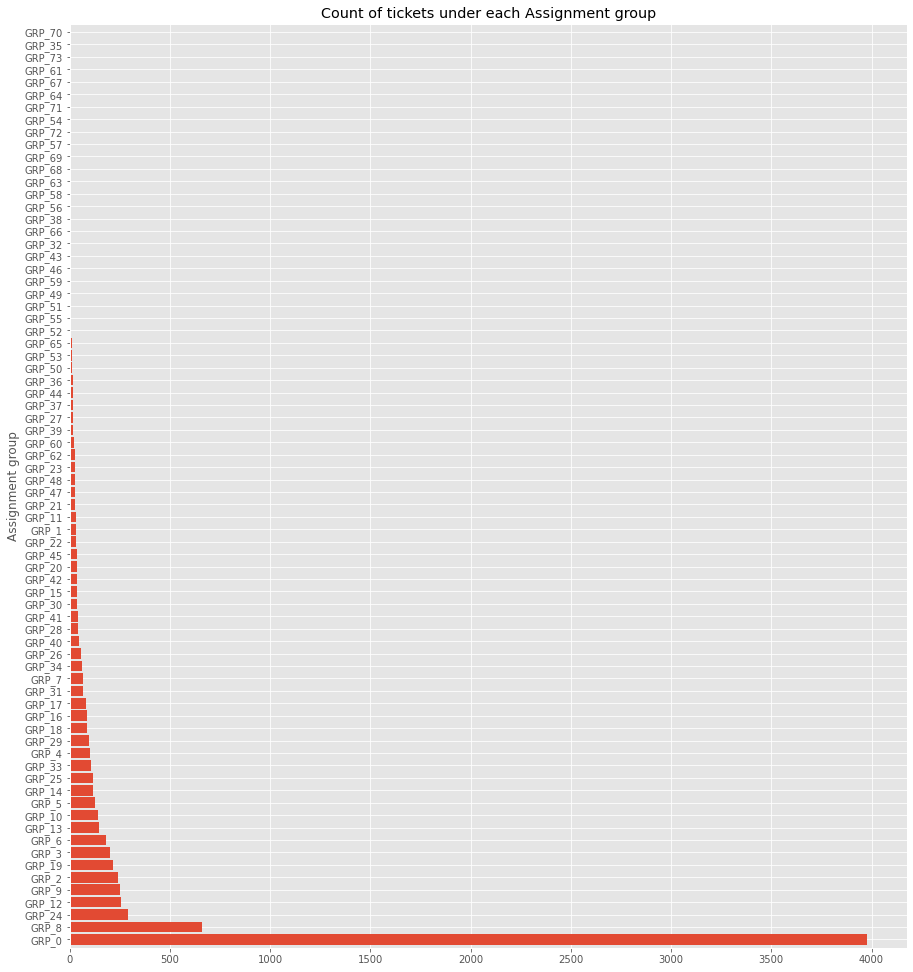

In [71]:
df_gb=dfEngTrans.groupby(['Assignment group']).size().sort_values(ascending=False)
df_gb.plot.barh(figsize=(15, 17), zorder=2, width=0.85, title="Count of tickets under each Assignment group")

From the above graph it is clear that GRP_0 is having the maximum tickets assigned of 3976

In [72]:
#Printing the stop words
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [73]:
#Remove the stop words from the text in the data set.
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

dfEngTrans['EngShtDescription']  = dfEngTrans['EngShtDescription'].apply(lambda text: remove_stopwords(text))
dfEngTrans['EngDescription']  = dfEngTrans['EngDescription'].apply(lambda text: remove_stopwords(text))

In [74]:
#Removing the numbers from the text in the dataset.
dfEngTrans['EngDescription'].replace('\d+', ' ', regex=True, inplace=True)
dfEngTrans['EngShtDescription'].replace('\d+', ' ', regex=True, inplace=True)

In [75]:
#Finding the words and thier occurance in the Description column
cnt = Counter()
for text in dfEngTrans['EngDescription'].values:
    for word in text.split():
        cnt[word] += 1

In [76]:
cnt

Counter({'verified': 187,
         'user': 1185,
         'details': 168,
         'employee': 150,
         'manager': 321,
         'name': 596,
         'checked': 87,
         'ad': 122,
         'reset': 857,
         'password': 1401,
         'advised': 55,
         'login': 558,
         'check': 355,
         'caller': 89,
         'confirmed': 118,
         'able': 387,
         'issue': 818,
         'resolved': 128,
         'hello': 725,
         'team': 386,
         'meetings': 21,
         'skype': 281,
         'etc': 57,
         'appearing': 17,
         'outlook': 528,
         'calendar': 37,
         'somebody': 2,
         'please': 2119,
         'advise': 96,
         'correct': 89,
         'kind': 66,
         'hi': 405,
         'cannot': 304,
         'log': 310,
         'vpn': 304,
         'best': 373,
         'unable': 790,
         'access': 829,
         'hr': 171,
         'tool': 1050,
         'page': 102,
         'error': 799,
         'engineer

In [77]:
print('Description Before lemmatizer :' + str(len(cnt)))

Description Before lemmatizer :11996


In [78]:
cnt1 = Counter()
for text in dfEngTrans['EngShtDescription'].values:
    for word in text.split():
        cnt1[word] += 1

In [79]:
cnt1

Counter({'login': 332,
         'issue': 486,
         'outlook': 418,
         'cant': 13,
         'log': 131,
         'vpn': 237,
         'unable': 720,
         'access': 495,
         'hr': 122,
         'tool': 736,
         'page': 32,
         'skype': 224,
         'error': 303,
         'engineering': 218,
         'event': 12,
         'critical': 11,
         'hostname': 357,
         'company': 356,
         'com': 117,
         'value': 10,
         'mountpoint': 1,
         'threshold': 21,
         'oracle': 9,
         'sid': 599,
         'erpdata': 2,
         'ticket': 281,
         'no': 92,
         'employment': 5,
         'status': 43,
         'new': 170,
         'non': 9,
         'employee': 45,
         'enter': 17,
         'user': 260,
         'name': 27,
         'disable': 4,
         'add': 64,
         'ins': 1,
         'update': 262,
         'inplant': 99,
         'says': 10,
         'connected': 30,
         'submit': 20,
         'reports':

In [80]:
print('Short Description Before lemmatizer :' + str(len(cnt1)))

Short Description Before lemmatizer :5365


Using Lemmatizer approach as the stemming would be triming the text when applied.

In [81]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

dfEngTrans['EngDescription'] = dfEngTrans['EngDescription'].apply(lambda text: lemmatize_words(text))
dfEngTrans['EngShtDescription'] = dfEngTrans['EngShtDescription'].apply(lambda text: lemmatize_words(text))

In [82]:
cnt2 = Counter()
for text in dfEngTrans['EngShtDescription'].values:
    for word in text.split():
        cnt2[word] += 1

In [83]:
cnt2

Counter({'login': 332,
         'issue': 561,
         'outlook': 418,
         'cant': 13,
         'log': 131,
         'vpn': 237,
         'unable': 720,
         'access': 496,
         'hr': 123,
         'tool': 766,
         'page': 38,
         'skype': 224,
         'error': 312,
         'engineering': 218,
         'event': 13,
         'critical': 11,
         'hostname': 357,
         'company': 357,
         'com': 117,
         'value': 12,
         'mountpoint': 1,
         'threshold': 21,
         'oracle': 9,
         'sid': 599,
         'erpdata': 2,
         'ticket': 287,
         'no': 93,
         'employment': 5,
         'status': 43,
         'new': 170,
         'non': 9,
         'employee': 58,
         'enter': 17,
         'user': 297,
         'name': 30,
         'disable': 4,
         'add': 64,
         'in': 42,
         'update': 266,
         'inplant': 99,
         'say': 10,
         'connected': 30,
         'submit': 20,
         'report': 1

In [84]:
print('Short Description After lemmatizer :' + str(len(cnt2)))

Short Description After lemmatizer :5041


In [85]:
#Finding the words and thier occurance in the Description column
cnt3 = Counter()
for text in dfEngTrans['EngDescription'].values:
    for word in text.split():
        cnt3[word] += 1

In [86]:
cnt3

Counter({'verified': 187,
         'user': 1374,
         'detail': 204,
         'employee': 188,
         'manager': 327,
         'name': 607,
         'checked': 87,
         'ad': 122,
         'reset': 858,
         'password': 1494,
         'advised': 55,
         'login': 558,
         'check': 357,
         'caller': 89,
         'confirmed': 118,
         'able': 387,
         'issue': 951,
         'resolved': 128,
         'hello': 725,
         'team': 404,
         'meeting': 87,
         'skype': 281,
         'etc': 57,
         'appearing': 17,
         'outlook': 528,
         'calendar': 39,
         'somebody': 2,
         'please': 2119,
         'advise': 96,
         'correct': 89,
         'kind': 66,
         'hi': 405,
         'cannot': 304,
         'log': 315,
         'vpn': 304,
         'best': 373,
         'unable': 790,
         'access': 834,
         'hr': 181,
         'tool': 1108,
         'page': 118,
         'error': 835,
         'engineerin

In [87]:
print('Description after lemmatizer :' + str(len(cnt3)))

Description after lemmatizer :11391


In [88]:
#Creating a new dataframe of Description and Assignment group
selected_columns = dfEngTrans[['EngDescription','Assignment group']]
dfEngDescr = selected_columns.copy()

In [89]:
#Creating a new dataframe of Short Description and Assignment group
selected_columns = dfEngTrans[['EngShtDescription','Assignment group']]
dfEngShtDescr = selected_columns.copy()

In [90]:
#Renaming the column name from 'EngShtDescription' to 'EngDescription' for union the newly created data set
dfEngShtDescr.rename(columns = {'EngShtDescription' : 'EngDescription'}, inplace = True)

In [91]:
#Creating a union of short description and description into a bigger data frame
union = pd.concat([dfEngDescr, dfEngShtDescr], ignore_index=True)

Creating a 2 data sets by having the Description with Assignment group and Short Description with Assignment group data sets and merging the data set inorder to increase the data set to test and train.  

In [92]:
union.describe()

,EngDescription,Assignment group
count,17000,17000
unique,10519,74
top,job job failed job scheduler,GRP_0
freq,870,7952


With the union data we can see that
* Their are around 10490 unique records in description
* Job, failed and scheduler is the most common text

In [93]:
#Removing the numbers from the text in the dataset.
union['EngDescription'].replace('\d+', ' ', regex=True, inplace=True)

In [94]:
union['EngDescription'] = union['EngDescription'].str.replace('  ', ' ').str.replace('  ', ' ').str.replace('  ', ' ').str.replace('  ', ' ').str.replace('  ', ' ')

In [95]:
if union.isnull().values.any():
  print('The given dataset contains null values.')
  print('Following are the column and its null value count')
  for (columnName, columnData) in union.iteritems():
   if union[columnName].isnull().values.any():
     print('    ['+columnName+'] : '+ str(union[columnName].isnull().sum())+'')
   else:
     print('    ['+columnName+'] : 0')
else :
  print('The given dataset does not contain any null values')

The given dataset does not contain any null values


In [96]:
union[union['EngDescription'].isnull()]

,EngDescription,Assignment group


In [97]:
#Removing the multiple occurance of a given word with the text.
union['EngDescription'] = (union['EngDescription'].str.split()
                              .apply(lambda x: OrderedDict.fromkeys(x).keys())
                              .str.join(' '))

In [98]:
if union.isnull().values.any():
  print('The given dataset contains null values.')
  print('Following are the column and its null value count')
  for (columnName, columnData) in union.iteritems():
   if union[columnName].isnull().values.any():
     print('    ['+columnName+'] : '+ str(union[columnName].isnull().sum())+'')
   else:
     print('    ['+columnName+'] : 0')
else :
  print('The given dataset does not contain any null values')

The given dataset does not contain any null values


In [99]:
#Creating a new column to label encode Assignment group
union['Assignment group Number']=''

In [100]:
for index, row in union.iterrows():
 # try:
 strTxt = row['Assignment group'].replace('GRP_', '').replace(' ', '')
 row['Assignment group Number']= strTxt

In [101]:
len(union['Assignment group Number'].unique())

74

In [102]:
union.groupby(['EngDescription','Assignment group']).size().count()

10657

From the above count we can see that there are duplicate values for the given Description and Assignment group.

In [103]:
#Drop the duplicate records
union=union.drop_duplicates(keep='last')

In [104]:
union.groupby(['EngDescription','Assignment group']).size().count()

10657

In [105]:
union.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10657 entries, 0 to 16999
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EngDescription           10657 non-null  object
 1   Assignment group         10657 non-null  object
 2   Assignment group Number  10657 non-null  object
dtypes: object(3)
memory usage: 333.0+ KB


In [106]:
union[union['EngDescription'] == '']

,EngDescription,Assignment group,Assignment group Number
707,,GRP_3,3
3937,,GRP_53,53
6888,,GRP_2,2
8168,,GRP_17,17
13894,,GRP_9,9
15897,,GRP_0,0


In [107]:
#Dropping the columns that have blank value.
union.drop(union[union['EngDescription'] == ''].index, inplace = True)

In [108]:
union[union['EngDescription'] == '']

,EngDescription,Assignment group,Assignment group Number


In [109]:
union[union['EngDescription'].isnull()]

,EngDescription,Assignment group,Assignment group Number


In [110]:
union.drop(union[union['EngDescription'].isnull()].index, inplace = True)

In [111]:
union.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10651 entries, 0 to 16999
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EngDescription           10651 non-null  object
 1   Assignment group         10651 non-null  object
 2   Assignment group Number  10651 non-null  object
dtypes: object(3)
memory usage: 652.8+ KB


In [112]:
# create excel writer object
writer = pd.ExcelWriter('/content/drive/MyDrive/Capstone/union_Eng.xlsx')
# write dataframe to excel
union.to_excel(writer)
# save the excel
writer.save()

In [113]:
path = '/content/drive/MyDrive/Capstone/union_Eng.xlsx'
union = pd.read_excel(path)

In [114]:
union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10651 entries, 0 to 10650
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               10651 non-null  int64 
 1   EngDescription           10651 non-null  object
 2   Assignment group         10651 non-null  object
 3   Assignment group Number  10651 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 333.0+ KB


In [115]:
union.drop(columns=['Unnamed: 0'],axis='columns', inplace=True)

In [116]:
union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10651 entries, 0 to 10650
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EngDescription           10651 non-null  object
 1   Assignment group         10651 non-null  object
 2   Assignment group Number  10651 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 249.8+ KB


In [117]:
union.head()

,EngDescription,Assignment group,Assignment group Number
0,verified user detail employee manager name che...,GRP_0,0
1,hello team meeting skype etc appearing outlook...,GRP_0,0
2,hi cannot log vpn best,GRP_0,0
3,event critical hostname company com value moun...,GRP_1,1
4,hi unable login company vpn website trying ope...,GRP_0,0


In [118]:
def complaint_to_words(comp):
    
    words = RegexpTokenizer('\w+').tokenize(comp)
    words = [re.sub(r'([xx]+)|([XX]+)|(\d+)', '', w).lower() for w in words]
    words = list(filter(lambda a: a != '', words))
    
    return words

In [119]:
all_words = list()
for comp in union['EngDescription']:
    for w in complaint_to_words(comp):
        all_words.append(w)

In [120]:
len(all_words)

119601

In [121]:
all_words

['verified',
 'user',
 'detail',
 'employee',
 'manager',
 'name',
 'checked',
 'ad',
 'reset',
 'password',
 'advised',
 'login',
 'check',
 'caller',
 'confirmed',
 'able',
 'issue',
 'resolved',
 'hello',
 'team',
 'meeting',
 'skype',
 'etc',
 'appearing',
 'outlook',
 'calendar',
 'somebody',
 'please',
 'advise',
 'correct',
 'kind',
 'hi',
 'cannot',
 'log',
 'vpn',
 'best',
 'event',
 'critical',
 'hostname',
 'company',
 'com',
 'value',
 'mountpoint',
 'threshold',
 'oracle',
 'sid',
 'erpdata',
 'sr',
 'psa',
 'd',
 'data',
 'perpsr',
 'hi',
 'unable',
 'login',
 'company',
 'vpn',
 'website',
 'trying',
 'open',
 'new',
 'session',
 'using',
 'link',
 'able',
 'get',
 'pls',
 'help',
 'urgently',
 'working',
 'home',
 'tomorrow',
 'due',
 'month',
 'end',
 'closing',
 'hello',
 'helpdesk',
 'able',
 'connect',
 'vpn',
 'home',
 'office',
 'couple',
 'f',
 'hour',
 'ago',
 'connected',
 'working',
 'anymore',
 'getting',
 'message',
 'session',
 'epired',
 'click',
 'link',


In [122]:
all_words_set = set(all_words)
unique_all_words = (list(all_words_set))

In [123]:
len(unique_all_words)

11979

In [124]:
unique_all_words

['gastronomy',
 'voigt',
 'correct',
 'initially',
 'jfbegac',
 'vavilova',
 'length',
 'publication',
 'he',
 'payment',
 'obtain',
 'std',
 'patrcja',
 'yzmcfah',
 'template',
 'vbap',
 'chose',
 'wont',
 'srcport',
 'span',
 'generate',
 'helmu',
 'subfolders',
 'cropped',
 'outstanding',
 'ptyzscl',
 'bvcdprt',
 'jfcrdavy',
 'francestrhuco',
 'boolean',
 'eaymvrzj',
 'hgayczecompany',
 'logins',
 'write',
 'strasse',
 'send',
 'ewew',
 'usaed',
 'productly',
 'fahdlecz',
 'disturbance',
 'aero',
 'httpeception',
 'sgqsuojr',
 'shift',
 'visitor',
 'albussdqp',
 'urgency',
 'blade',
 'khdgd',
 'tooll',
 'abode',
 'jdqvuhlr',
 'luck',
 'seeking',
 'netacuity',
 'eists',
 'theft',
 'wczgafal',
 'foul',
 'nuksytoh',
 'tor',
 'registergertecht',
 'unless',
 'wuryhtudack',
 'without',
 'went',
 'upgtrvnj',
 'ekpsm',
 'oppo',
 'sarhytukas',
 'kuznvase',
 'adelmk',
 'closely',
 'bujiesrg',
 'qmsoft',
 'although',
 'dhkovprf',
 'telekom',
 'hdfvbjoe',
 'surname',
 'dhdtwdd',
 'gt',
 'vvfrtg

In [125]:
index_dict = dict()
numWords = 1
for word in set(unique_all_words):
    index_dict[word] = numWords
    numWords += 1

In [126]:
index_dict

{'gastronomy': 1,
 'voigt': 2,
 'correct': 3,
 'initially': 4,
 'jfbegac': 5,
 'vavilova': 6,
 'length': 7,
 'publication': 8,
 'obtain': 9,
 'he': 10,
 'payment': 11,
 'std': 12,
 'patrcja': 13,
 'yzmcfah': 14,
 'template': 15,
 'vbap': 16,
 'chose': 17,
 'wont': 18,
 'srcport': 19,
 'span': 20,
 'generate': 21,
 'helmu': 22,
 'subfolders': 23,
 'cropped': 24,
 'outstanding': 25,
 'ptyzscl': 26,
 'bvcdprt': 27,
 'jfcrdavy': 28,
 'francestrhuco': 29,
 'boolean': 30,
 'eaymvrzj': 31,
 'hgayczecompany': 32,
 'logins': 33,
 'write': 34,
 'strasse': 35,
 'send': 36,
 'ewew': 37,
 'usaed': 38,
 'productly': 39,
 'fahdlecz': 40,
 'disturbance': 41,
 'aero': 42,
 'httpeception': 43,
 'sgqsuojr': 44,
 'shift': 45,
 'visitor': 46,
 'albussdqp': 47,
 'urgency': 48,
 'blade': 49,
 'khdgd': 50,
 'tooll': 51,
 'abode': 52,
 'jdqvuhlr': 53,
 'luck': 54,
 'seeking': 55,
 'netacuity': 56,
 'eists': 57,
 'theft': 58,
 'wczgafal': 59,
 'foul': 60,
 'nuksytoh': 61,
 'tor': 62,
 'registergertecht': 63,
 '

In [127]:
union['tokenized'] = union.apply(lambda row: nltk.word_tokenize(row['EngDescription']), axis=1)

In [128]:
union.loc[1,'tokenized']

['hello',
 'team',
 'meeting',
 'skype',
 'etc',
 'appearing',
 'outlook',
 'calendar',
 'somebody',
 'please',
 'advise',
 'correct',
 'kind']

In [129]:
union.head()

,EngDescription,Assignment group,Assignment group Number,tokenized
0,verified user detail employee manager name che...,GRP_0,0,"[verified, user, detail, employee, manager, na..."
1,hello team meeting skype etc appearing outlook...,GRP_0,0,"[hello, team, meeting, skype, etc, appearing, ..."
2,hi cannot log vpn best,GRP_0,0,"[hi, can, not, log, vpn, best]"
3,event critical hostname company com value moun...,GRP_1,1,"[event, critical, hostname, company, com, valu..."
4,hi unable login company vpn website trying ope...,GRP_0,0,"[hi, unable, login, company, vpn, website, try..."


In [130]:
union[union['EngDescription'] == '']

,EngDescription,Assignment group,Assignment group Number,tokenized


In [131]:
union[union['EngDescription'].isnull()]

,EngDescription,Assignment group,Assignment group Number,tokenized


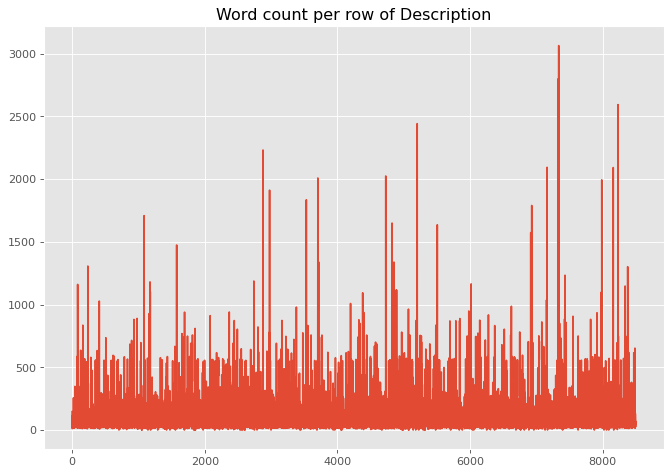

Review length: 
Mean 110.61 words (172.504112)


In [132]:
figure(figsize=(10, 7), dpi=80)
# Summarize review length
result = [len(x) for x in dfEngTrans.EngDescription]
# plot review length
pyplot.plot(result)
pyplot.title('Word count per row of Description')
pyplot.show()
print("Review length: ")
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))

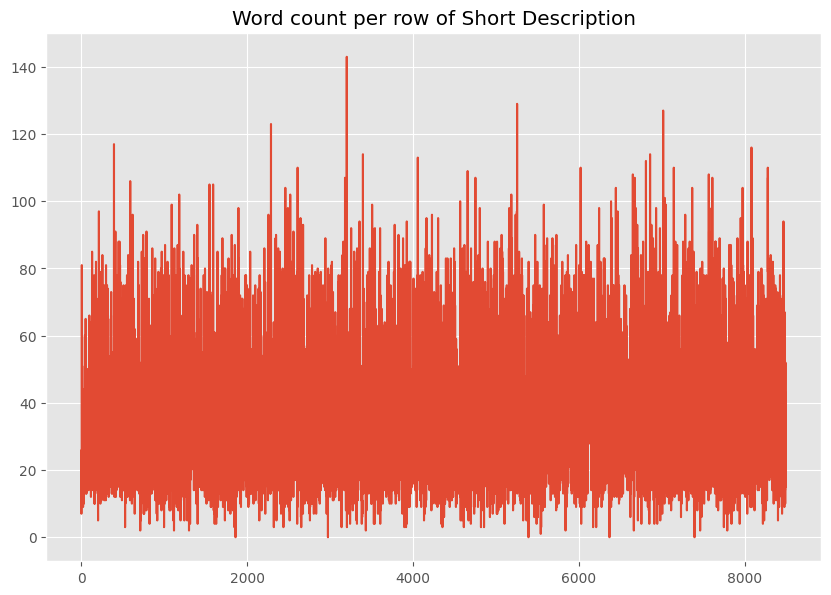

Review length: 
Mean 34.48 words (19.228043)


In [133]:
figure(figsize=(10, 7), dpi=100)

# Summarize review length
result = [len(x) for x in dfEngTrans.EngShtDescription]
# plot review length
pyplot.plot(result)
pyplot.title('Word count per row of Short Description')
pyplot.show()
print("Review length: ")
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))

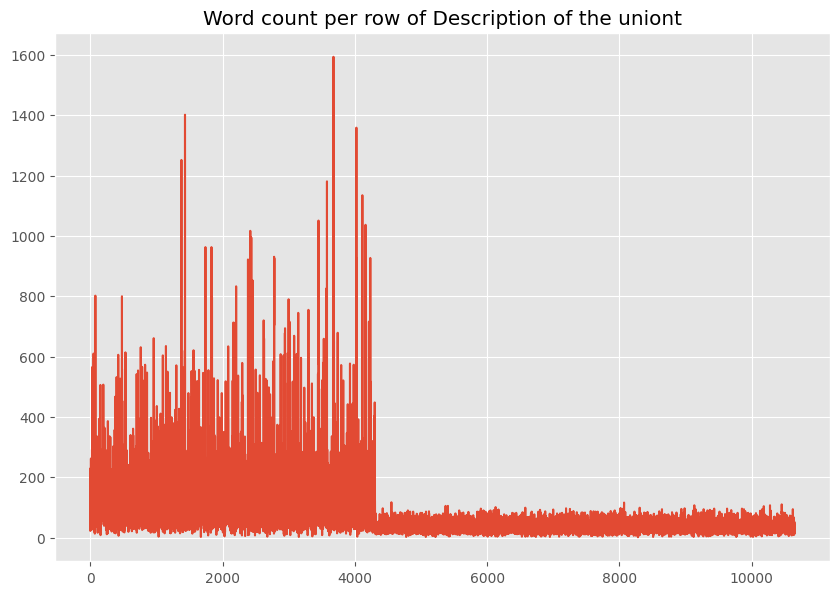

Review length: 
Mean 76.63 words (97.048264)


In [134]:
figure(figsize=(10, 7), dpi=100)

# Summarize review length
result = [len(x) for x in union.EngDescription]
# plot review length
pyplot.plot(result)
pyplot.title('Word count per row of Description of the uniont')
pyplot.show()
print("Review length: ")
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))

From the above it is clear that the 1st 8500 records are of Description and followed by Description.

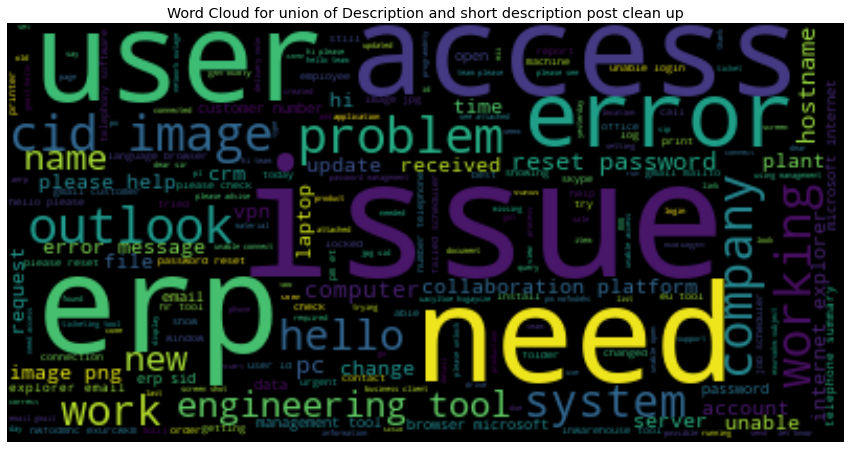

In [135]:
WordClouddf(union['EngDescription'],'Word Cloud for union of Description and short description post clean up')

# Approach 1 : Raw data 

## Train and Test Data Set up

In [136]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(union['EngDescription'], union['Assignment group'], test_size=0.2, random_state=42)

In [137]:
train_x.head()

4047     warehouse toolmail seem picking incoming call ...
10033                                              headset
6712         logon balancing error erp even connecting vpn
5851     power outage germany fine machining company se...
1901     presumably access iphone locked account passwo...
Name: EngDescription, dtype: object

In [138]:
train_y.head()

4047      GRP_0
10033     GRP_0
6712      GRP_0
5851      GRP_8
1901     GRP_24
Name: Assignment group, dtype: object

In [139]:
encoder = preprocessing.LabelEncoder()
train_y_encoder = encoder.fit_transform(train_y)
test_y_encoder = encoder.fit_transform(test_y)

In [140]:
tfidf_vect = TfidfVectorizer(min_df=5 ,use_idf=True,analyzer='word', token_pattern=r'\w{1,}')
tfidf_vect.fit(union['EngDescription'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(test_x)

In [141]:
maxlen = 300
grpCnt = len(union['Assignment group'].unique())

In [142]:
tokenizer = Tokenizer(num_words=numWords ,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
tokenizer.fit_on_texts(union['tokenized'])

X_train = tokenizer.texts_to_sequences(train_x)
X_train = pad_sequences(X_train, maxlen = maxlen)

X_test  = tokenizer.texts_to_sequences(test_x)
X_test = pad_sequences(X_test, maxlen = maxlen)

y_train = train_y_encoder
y_test  = test_y_encoder

In [143]:
num_class = len(np.unique(union['Assignment group'].values))

In [144]:
MAX_LENGTH =300

##ML

### Kfold with different ML algorithms and SKlearn's MLP and testing F1 score with different average values

In [145]:
#Creating a function will can be called for different type of 
#average approaches for the Kfold of different ML Algorithsm
def ml_algosKfold(xtrain_tfidf,xvalid_tfidf,train_y,test_y,average):
  # create all the machine learning models
  seed      = 43
  num_trees = 100
  models = []
  models.append(('LR', LogisticRegression(random_state=seed)))
  models.append(('KNN', KNeighborsClassifier()))
  models.append(('CART', DecisionTreeClassifier(random_state=seed)))
  models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=seed)))
  models.append(('NB', MultinomialNB()))
  models.append(('SVM', SVC(random_state=seed)))
  models.append(('XGBOOST', XGBClassifier()))
  models.append(('MLP Classifier', MLPClassifier(solver='lbfgs', alpha=1e-5,
                                                hidden_layer_sizes=(100, 2), random_state=1)))

  # verify the shape of the feature vector and labels
  print("[STATUS] features shape: {}".format(xtrain_tfidf.shape))
  print("[STATUS] labels shape: {}".format(train_y.shape))

  print("[STATUS] training started...")

  scoring    = "accuracy"
  results=[]
  names=[]

  # 10-fold cross validation
  for name, model in models:
      kfold = KFold(n_splits=10, random_state=seed)
      # cv_results = cross_val_score(model, xtrain_tfidf, train_y, cv=kfold, scoring=scoring)
      cv_results = cross_val_score(model, xtrain_tfidf, train_y, cv=kfold, scoring=scoring)
      results.append(cv_results)
      names.append(name)
      model.fit(xtrain_tfidf, train_y)    
      y_predict_test = model.predict(xvalid_tfidf)
      #F1_score
      score_test = metrics.f1_score(test_y, y_predict_test, pos_label=list(set(test_y)),average=average)
      #print(score_test)
      msg = "%s: %f (%f) f1_score %f" % (name, cv_results.mean(), cv_results.std(),score_test.mean())
      #msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
      print(msg)

  # boxplot algorithm comparison
  fig = pyplot.figure(figsize=(16, 10), dpi=100)
  fig.suptitle('Machine Learning algorithm comparison with average = ' + average)
  ax = fig.add_subplot(111)
  pyplot.boxplot(results)
  ax.set_xticklabels(names)
  pyplot.show()

[STATUS] features shape: (8520, 2486)
[STATUS] labels shape: (8520,)
[STATUS] training started...
LR: 0.570540 (0.023710) f1_score 0.575317
KNN: 0.518779 (0.017226) f1_score 0.520882
CART: 0.513380 (0.018063) f1_score 0.509620
RF: 0.599413 (0.021075) f1_score 0.603003
NB: 0.511737 (0.020612) f1_score 0.517597
SVM: 0.575822 (0.022147) f1_score 0.587987
XGBOOST: 0.563967 (0.020446) f1_score 0.565462
MLP Classifier: 0.423826 (0.023600) f1_score 0.413421


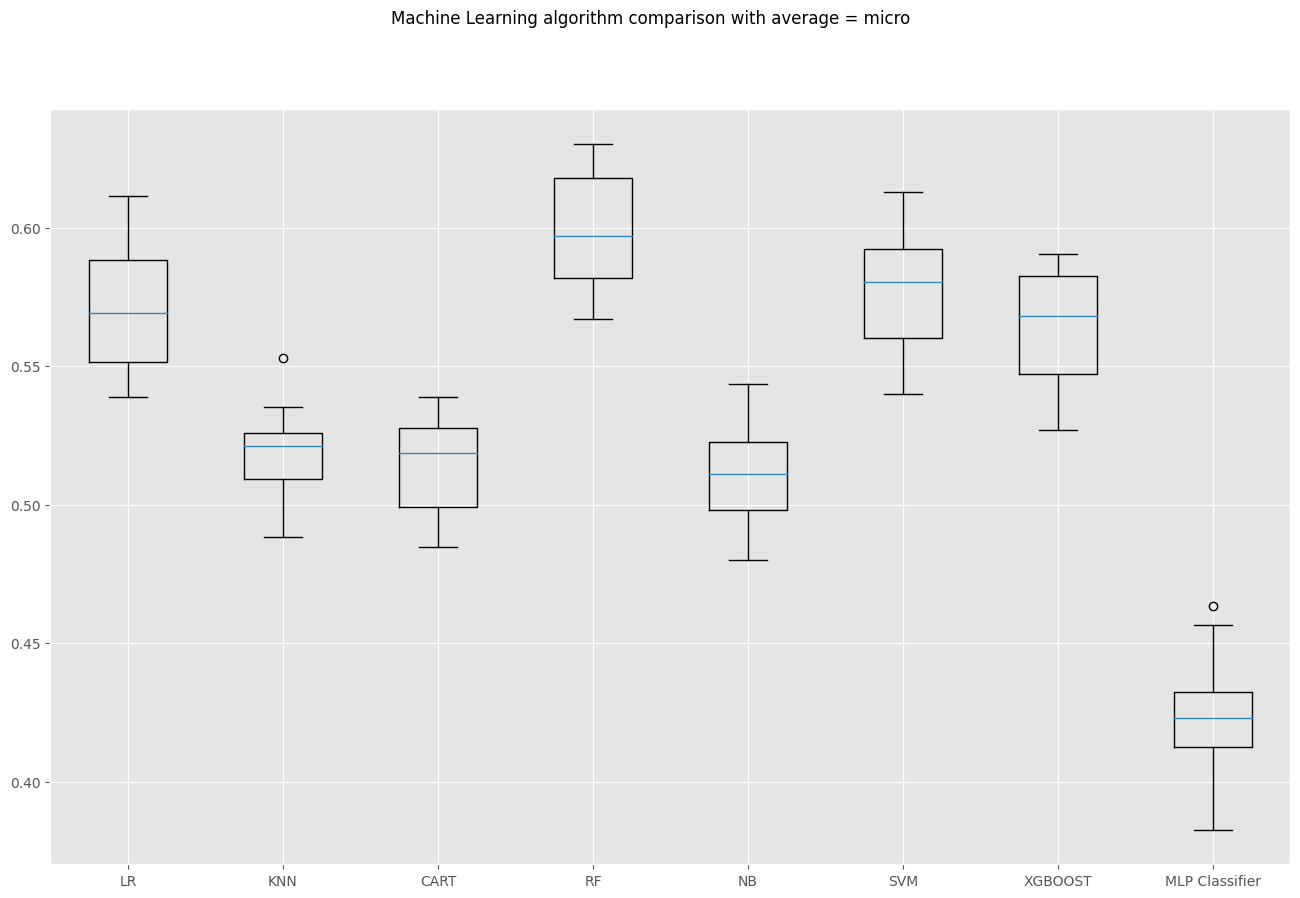

In [146]:
# with average micro
ml_algosKfold(xtrain_tfidf,xvalid_tfidf,train_y,test_y,'micro')

[STATUS] features shape: (8520, 2486)
[STATUS] labels shape: (8520,)
[STATUS] training started...
LR: 0.570540 (0.023710) f1_score 0.164518
KNN: 0.519601 (0.018334) f1_score 0.159841
CART: 0.513380 (0.018063) f1_score 0.247486
RF: 0.599413 (0.021075) f1_score 0.304917
NB: 0.511737 (0.020612) f1_score 0.066321
SVM: 0.575822 (0.022147) f1_score 0.194701
XGBOOST: 0.563967 (0.020446) f1_score 0.254506
MLP Classifier: 0.423826 (0.023600) f1_score 0.029457


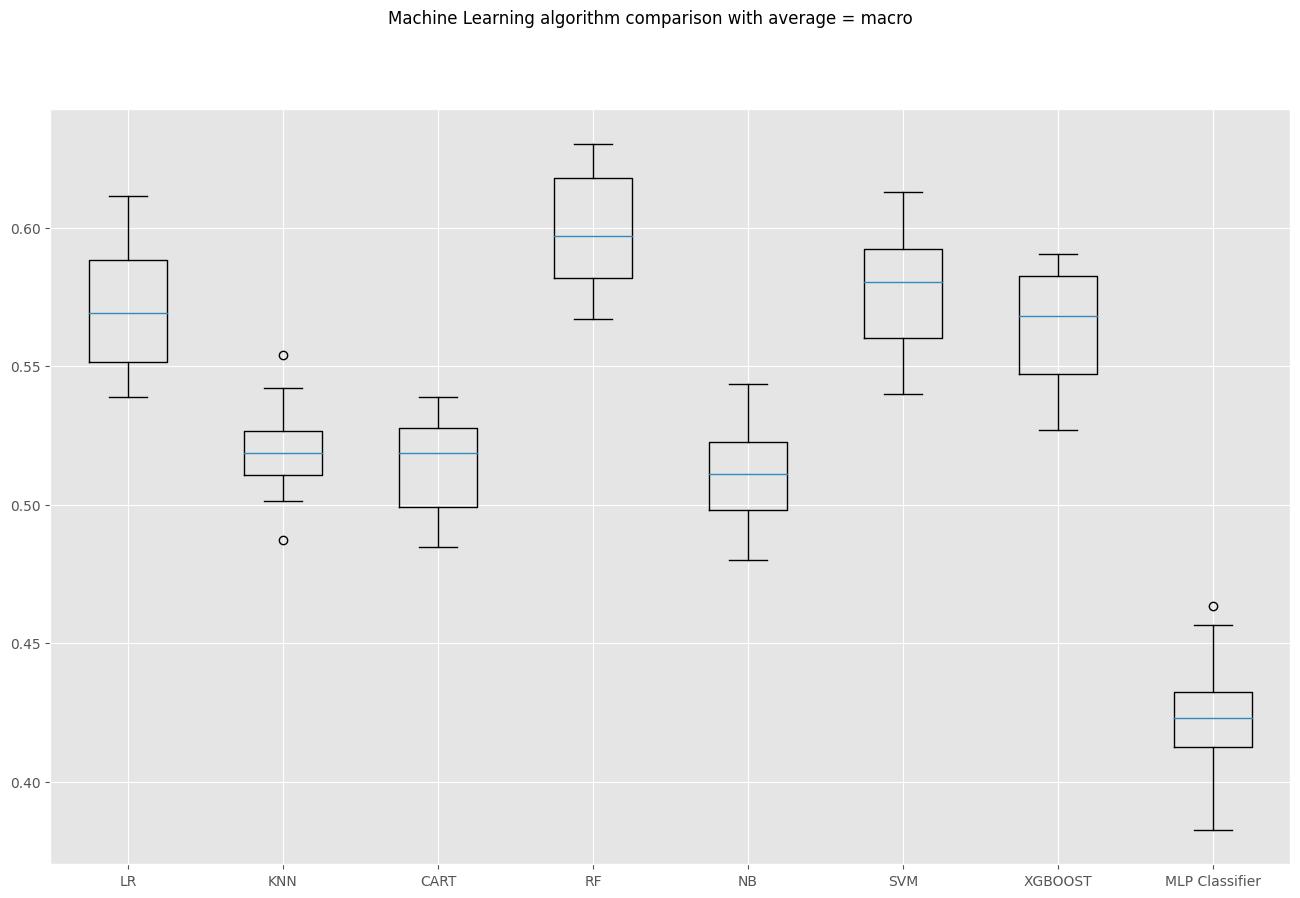

In [147]:
# with average macro
ml_algosKfold(xtrain_tfidf,xvalid_tfidf,train_y,test_y,'macro')

[STATUS] features shape: (8520, 2486)
[STATUS] labels shape: (8520,)
[STATUS] training started...
LR: 0.570540 (0.023710) f1_score 0.497977
KNN: 0.519601 (0.018334) f1_score 0.431637
CART: 0.513380 (0.018063) f1_score 0.496143
RF: 0.599413 (0.021075) f1_score 0.551804
NB: 0.511737 (0.020612) f1_score 0.390689
SVM: 0.575822 (0.022147) f1_score 0.509079
XGBOOST: 0.563967 (0.020446) f1_score 0.501995
MLP Classifier: 0.423826 (0.023600) f1_score 0.358920


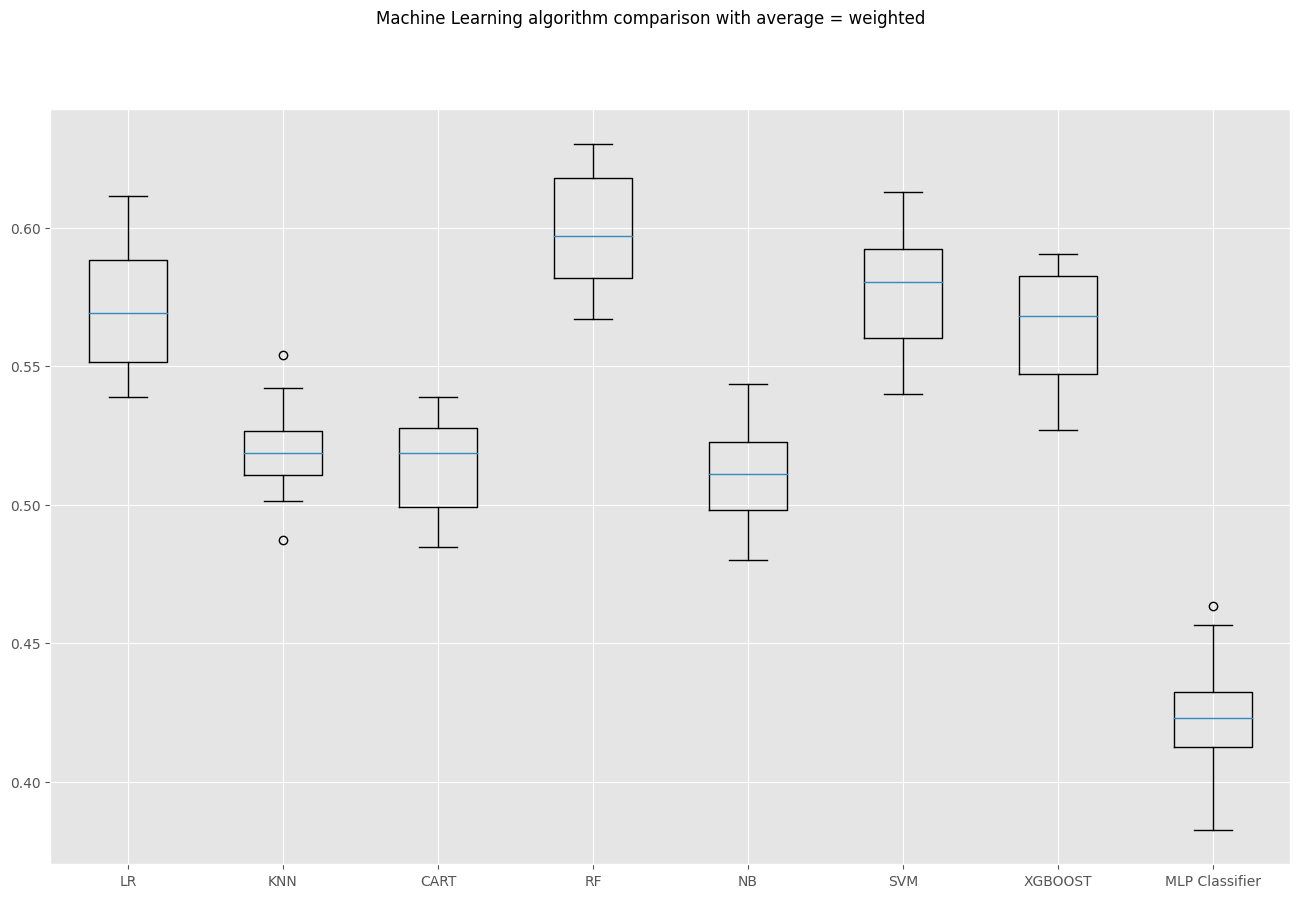

In [148]:
# with average weighted
ml_algosKfold(xtrain_tfidf,xvalid_tfidf,train_y,test_y,'weighted')

In [149]:
pos_label=list(set(test_y))
print(pos_label)

['GRP_21', 'GRP_66', 'GRP_48', 'GRP_71', 'GRP_16', 'GRP_41', 'GRP_55', 'GRP_34', 'GRP_45', 'GRP_51', 'GRP_13', 'GRP_36', 'GRP_68', 'GRP_60', 'GRP_4', 'GRP_2', 'GRP_46', 'GRP_26', 'GRP_47', 'GRP_14', 'GRP_39', 'GRP_40', 'GRP_0', 'GRP_9', 'GRP_1', 'GRP_63', 'GRP_22', 'GRP_15', 'GRP_24', 'GRP_28', 'GRP_3', 'GRP_10', 'GRP_18', 'GRP_17', 'GRP_20', 'GRP_30', 'GRP_5', 'GRP_19', 'GRP_33', 'GRP_42', 'GRP_69', 'GRP_6', 'GRP_32', 'GRP_53', 'GRP_38', 'GRP_65', 'GRP_37', 'GRP_7', 'GRP_12', 'GRP_50', 'GRP_62', 'GRP_52', 'GRP_25', 'GRP_8', 'GRP_54', 'GRP_43', 'GRP_59', 'GRP_29', 'GRP_31', 'GRP_27', 'GRP_44', 'GRP_11', 'GRP_23', 'GRP_49']


In [150]:
from sklearn.ensemble import RandomForestClassifier

rfcl = RandomForestClassifier(n_estimators=150, random_state=50, bootstrap=False)
rfcl = rfcl.fit(xtrain_tfidf, train_y)
pred_RF = rfcl.predict(xvalid_tfidf)
acc_RF = accuracy_score(test_y, pred_RF)
print("Random forest Accuracy Score {}".format(acc_RF))
#F1_score
score_test = metrics.f1_score(test_y, pred_RF, pos_label=list(set(test_y)), average = 'weighted')
#score_test = metrics.f1_score(test_y, pred_RF, average = "macro")
print(score_test.mean())

Random forest Accuracy Score 0.6184889723134679
0.5766384128897322


In [151]:
from sklearn.ensemble import RandomForestClassifier

rfcl = RandomForestClassifier(n_estimators=150, random_state=50, bootstrap=False)
rfcl = rfcl.fit(xtrain_tfidf, train_y)
pred_RF = rfcl.predict(xvalid_tfidf)
acc_RF = accuracy_score(test_y, pred_RF)
print("Random forest Accuracy Score {}".format(acc_RF))
#F1_score
score_test = metrics.f1_score(test_y, pred_RF, pos_label=list(set(test_y)), average = 'micro')
#score_test = metrics.f1_score(test_y, pred_RF, average = "macro")
print(score_test.mean())

Random forest Accuracy Score 0.6184889723134679
0.6184889723134679


Micro- and macro-averages (for whatever metric) will compute slightly different things, and thus their interpretation differs. A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, micro-average is preferable if you suspect there might be class imbalance.Here we are dealing with a highly imbalanced dataset which suggests to use average as micro or weighted.

##Deep Learning methods tryout





In [152]:
num_epochs = 10
batch_size=100

### 1. Traninig with ANN

Artificial Neural Networks (ANN) are multi-layer fully-connected neural nets. They consist of an input layer, multiple hidden layers, and an output layer. Every node in one layer is connected to every other node in the next layer. 

In [153]:
num_class = len(np.unique(union['Assignment group'].values))
inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(numWords,
                            128,
                            input_length=MAX_LENGTH)(inputs)
x = Flatten()(embedding_layer)
x = Dense(32, activation='relu')(x)

predictions = Dense(num_class, activation='softmax')(x)
model = Model(inputs=[inputs], outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()
filepath="weights-simple.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
model_history = model.fit([X_train], batch_size=batch_size, y=to_categorical(y_train), verbose=1, validation_split=0.2, 
          shuffle=True, epochs=num_epochs, callbacks=[checkpointer])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 300, 128)          1533440   
_________________________________________________________________
flatten (Flatten)            (None, 38400)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                1228832   
_________________________________________________________________
dense_1 (Dense)              (None, 74)                2442      
Total params: 2,764,714
Trainable params: 2,764,714
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
69/69 [==============================] - 5s 29ms/step - loss: 3.3540 - acc: 0.3895 - val_loss: 2.7927 - va

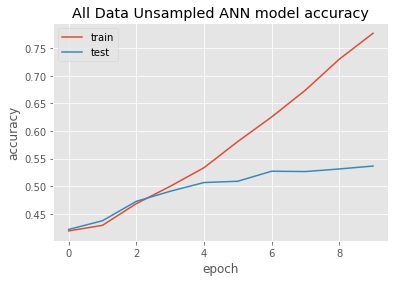

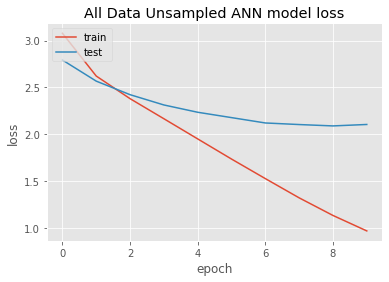

In [154]:
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])

plt.title('All Data Unsampled ANN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

plt.title('All Data Unsampled ANN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

###2. RNN

Recurrent neural networks (RNN) are the state of the art algorithm for sequential data. It remembers its input, due to an internal memory, which makes it perfectly suited for machine learning problems that involve sequential data. 

In [155]:
embed = Embedding(numWords+1,output_dim=50,input_length=maxlen,trainable=True)
model = Sequential()
model.add(Input(shape=(maxlen,),dtype=tf.int64))
model.add(embed)
model.add(Conv1D(100,10,activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(100,10,activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(128))) ## drop it later maybe for testing ..
model.add(Dropout(0.3))
model.add(Dense(100,activation='relu'))
model.add(Dense(grpCnt,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 50)           599050    
_________________________________________________________________
conv1d (Conv1D)              (None, 291, 100)          50100     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 145, 100)          0         
_________________________________________________________________
dropout (Dropout)            (None, 145, 100)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 136, 100)          100100    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 68, 100)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               2

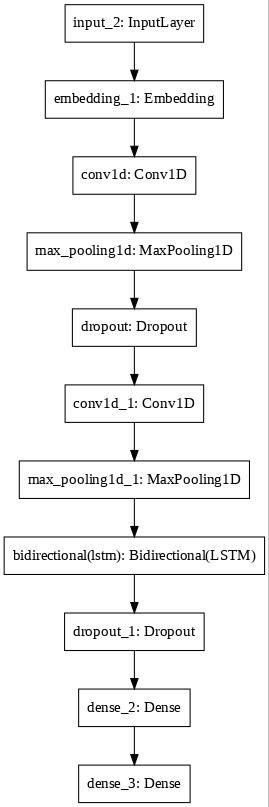

In [156]:
plot_model(model,to_file="RNN.jpg", dpi=75)

In [157]:
checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
model_history=model.fit(X_train,y_train,batch_size=batch_size, epochs=num_epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_test, y_test))

Epoch 1/10
86/86 [==============================] - 35s 38ms/step - loss: 3.1674 - accuracy: 0.4024 - val_loss: 3.0166 - val_accuracy: 0.4359

Epoch 00001: val_accuracy improved from -inf to 0.43595, saving model to model-001-0.435946.h5
Epoch 2/10
86/86 [==============================] - 2s 29ms/step - loss: 2.6849 - accuracy: 0.4351 - val_loss: 2.8198 - val_accuracy: 0.4266

Epoch 00002: val_accuracy did not improve from 0.43595
Epoch 3/10
86/86 [==============================] - 2s 29ms/step - loss: 2.3904 - accuracy: 0.4612 - val_loss: 2.8170 - val_accuracy: 0.4420

Epoch 00003: val_accuracy improved from 0.43595 to 0.44205, saving model to model-003-0.442046.h5
Epoch 4/10
86/86 [==============================] - 2s 29ms/step - loss: 2.2752 - accuracy: 0.4713 - val_loss: 2.8628 - val_accuracy: 0.4425

Epoch 00004: val_accuracy improved from 0.44205 to 0.44252, saving model to model-004-0.442515.h5
Epoch 5/10
86/86 [==============================] - 3s 29ms/step - loss: 2.1132 - acc

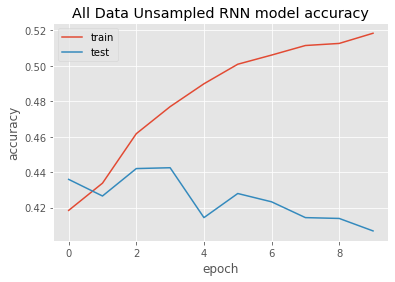

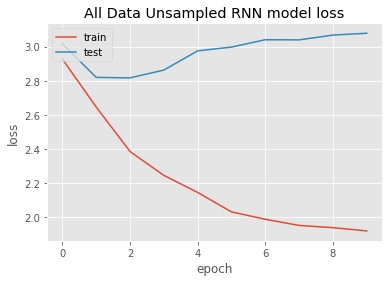

In [158]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('All Data Unsampled RNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

plt.title('All Data Unsampled RNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### 3. LSTM

Long Short-Term Memory (LSTM) networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problems.

In [159]:
MAX_LENGTH = 300

In [160]:
inputs = keras.Input(shape=(MAX_LENGTH, ), dtype="int32")

# Embed each integer in a 128-dimensional vector
x = layers.Embedding(numWords, 128)(inputs)
x = layers.Dropout(0.2)(x)

# Add 2 LSTM layers
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(64, return_sequences=False)(x)

x = layers.Dropout(0.2)(x)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(num_class, activation='softmax')(x)

In [161]:
# Add a classifier
lstm_model = keras.Model(inputs, outputs)
lstm_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 300)]             0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 300, 128)          1533440   
_________________________________________________________________
dropout_2 (Dropout)          (None, 300, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 300, 64)           49408     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080

In [162]:
lstm_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [163]:
training_history = lstm_model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(X_test, y_test))

Epoch 1/10
86/86 [==============================] - 7s 53ms/step - loss: 3.4868 - accuracy: 0.3940 - val_loss: 3.0141 - val_accuracy: 0.4359
Epoch 2/10
86/86 [==============================] - 4s 44ms/step - loss: 2.7877 - accuracy: 0.4240 - val_loss: 2.9688 - val_accuracy: 0.4359
Epoch 3/10
86/86 [==============================] - 4s 44ms/step - loss: 2.6254 - accuracy: 0.4297 - val_loss: 2.7958 - val_accuracy: 0.4341
Epoch 4/10
86/86 [==============================] - 4s 44ms/step - loss: 2.3830 - accuracy: 0.4597 - val_loss: 2.7750 - val_accuracy: 0.4402
Epoch 5/10
86/86 [==============================] - 4s 44ms/step - loss: 2.1920 - accuracy: 0.4802 - val_loss: 2.8426 - val_accuracy: 0.4528
Epoch 6/10
86/86 [==============================] - 4s 44ms/step - loss: 2.0709 - accuracy: 0.5022 - val_loss: 2.9092 - val_accuracy: 0.4575
Epoch 7/10
86/86 [==============================] - 4s 44ms/step - loss: 1.9461 - accuracy: 0.5293 - val_loss: 2.9192 - val_accuracy: 0.4425
Epoch 8/10
86

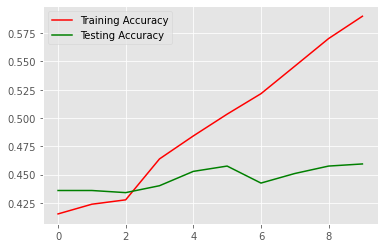

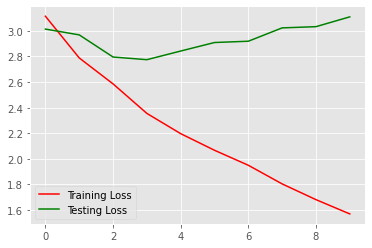

In [164]:

acc=training_history.history['accuracy']
val_acc=training_history.history['val_accuracy']
loss=training_history.history['loss']
val_loss=training_history.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()

### 4. Bidirectional GATED RECURRENT UNIT (GRU)

Gated recurrent units are a gating mechanism in recurrent neural networks. The GRU is like a long short-term memory (LSTM) with a forget gate, but has fewer parameters than LSTM, as it lacks an output gate. 

In [165]:
#Building the GRU Model
embedding_dim = 128
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(numWords, embedding_dim, input_length=MAX_LENGTH),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(16)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(num_class, activation='softmax')
])

model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 300, 128)          1533440   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                14016     
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 198       
_________________________________________________________________
dense_7 (Dense)              (None, 74)                518       
Total params: 1,548,172
Trainable params: 1,548,172
Non-trainable params: 0
_________________________________________________________________


In [166]:
#model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_gru.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
num_epochs = 10
batch_size=100

In [167]:
gru_training_history = model_gru.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(X_test, y_test))


Epoch 1/10
86/86 [==============================] - 6s 46ms/step - loss: 4.2821 - accuracy: 0.3014 - val_loss: 4.1820 - val_accuracy: 0.0357
Epoch 2/10
86/86 [==============================] - 3s 39ms/step - loss: 3.9329 - accuracy: 0.0501 - val_loss: 2.9815 - val_accuracy: 0.4359
Epoch 3/10
86/86 [==============================] - 3s 39ms/step - loss: 2.6719 - accuracy: 0.4266 - val_loss: 2.8243 - val_accuracy: 0.4341
Epoch 4/10
86/86 [==============================] - 3s 39ms/step - loss: 2.3773 - accuracy: 0.4607 - val_loss: 2.7925 - val_accuracy: 0.4350
Epoch 5/10
86/86 [==============================] - 3s 39ms/step - loss: 2.2212 - accuracy: 0.4713 - val_loss: 2.7924 - val_accuracy: 0.4369
Epoch 6/10
86/86 [==============================] - 3s 38ms/step - loss: 2.0737 - accuracy: 0.4950 - val_loss: 2.8025 - val_accuracy: 0.4331
Epoch 7/10
86/86 [==============================] - 3s 39ms/step - loss: 1.9858 - accuracy: 0.5136 - val_loss: 2.8415 - val_accuracy: 0.4336
Epoch 8/10
86

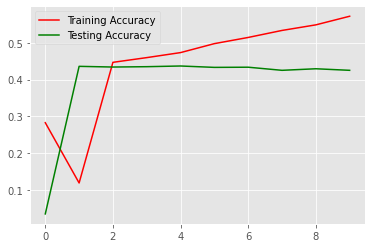

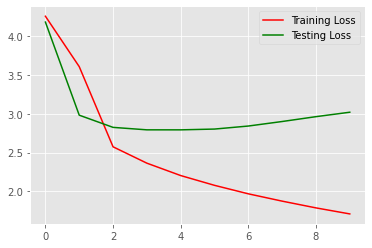

In [168]:
#Evaluating Accuracy and Loss of the model
acc=gru_training_history.history['accuracy']
val_acc=gru_training_history.history['val_accuracy']
loss=gru_training_history.history['loss']
val_loss=gru_training_history.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch

plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show() 

# Approach 2: Grouping the Assignment Group

## Train and Test Data Set up

In [169]:
ticket_data=union.copy(deep=True)

In [170]:
ticket_data.head(10)

,EngDescription,Assignment group,Assignment group Number,tokenized
0,verified user detail employee manager name che...,GRP_0,0,"[verified, user, detail, employee, manager, na..."
1,hello team meeting skype etc appearing outlook...,GRP_0,0,"[hello, team, meeting, skype, etc, appearing, ..."
2,hi cannot log vpn best,GRP_0,0,"[hi, can, not, log, vpn, best]"
3,event critical hostname company com value moun...,GRP_1,1,"[event, critical, hostname, company, com, valu..."
4,hi unable login company vpn website trying ope...,GRP_0,0,"[hi, unable, login, company, vpn, website, try..."
5,hello helpdesk able connect vpn home office co...,GRP_0,0,"[hello, helpdesk, able, connect, vpn, home, of..."
6,hello able connect company network vpn pls che...,GRP_0,0,"[hello, able, connect, company, network, vpn, ..."
7,hi please reset user password client id userna...,GRP_0,0,"[hi, please, reset, user, password, client, id..."
8,gentles two device trying share ip address one...,GRP_4,4,"[gentles, two, device, trying, share, ip, addr..."
9,status button disappearing second,GRP_0,0,"[status, button, disappearing, second]"


In [171]:
ticket_data['Assignment group'].value_counts()

GRP_0     4540
GRP_8      421
GRP_12     415
GRP_2      415
GRP_19     378
          ... 
GRP_57       2
GRP_73       2
GRP_35       2
GRP_64       2
GRP_61       1
Name: Assignment group, Length: 74, dtype: int64

In [172]:
ticket_data['Assignment group Number'].value_counts()

0     4540
8      421
12     415
2      415
19     378
      ... 
57       2
67       2
35       2
72       2
61       1
Name: Assignment group Number, Length: 74, dtype: int64

In [173]:
df1 = pd.DataFrame(ticket_data['Assignment group'].value_counts())
df2 = df1.T

In [174]:
ticket_data['Count']=0

In [175]:
ticket_data['Count'] = ticket_data.apply(lambda row: df2[row['Assignment group']] , axis=1)

In [176]:
ticket_data.head(20)

,EngDescription,Assignment group,Assignment group Number,tokenized,Count
0,verified user detail employee manager name che...,GRP_0,0,"[verified, user, detail, employee, manager, na...",4540
1,hello team meeting skype etc appearing outlook...,GRP_0,0,"[hello, team, meeting, skype, etc, appearing, ...",4540
2,hi cannot log vpn best,GRP_0,0,"[hi, can, not, log, vpn, best]",4540
3,event critical hostname company com value moun...,GRP_1,1,"[event, critical, hostname, company, com, valu...",44
4,hi unable login company vpn website trying ope...,GRP_0,0,"[hi, unable, login, company, vpn, website, try...",4540
5,hello helpdesk able connect vpn home office co...,GRP_0,0,"[hello, helpdesk, able, connect, vpn, home, of...",4540
6,hello able connect company network vpn pls che...,GRP_0,0,"[hello, able, connect, company, network, vpn, ...",4540
7,hi please reset user password client id userna...,GRP_0,0,"[hi, please, reset, user, password, client, id...",4540
8,gentles two device trying share ip address one...,GRP_4,4,"[gentles, two, device, trying, share, ip, addr...",169
9,status button disappearing second,GRP_0,0,"[status, button, disappearing, second]",4540


In [177]:
ticket_data.loc[ticket_data['Count'] <= 20 , "Assignment group"]

148      GRP_35
178      GRP_38
263      GRP_43
352      GRP_46
512      GRP_49
          ...  
10354    GRP_58
10379    GRP_73
10502    GRP_52
10543    GRP_72
10650    GRP_49
Name: Assignment group, Length: 196, dtype: object

In [178]:
ticket_data.loc[ticket_data['Count'] <= 20 , "Assignment group"].value_counts()

GRP_53    20
GRP_52    18
GRP_60    15
GRP_51    15
GRP_55    14
GRP_49    12
GRP_46    12
GRP_59    11
GRP_43    10
GRP_32     8
GRP_66     6
GRP_38     6
GRP_68     6
GRP_58     6
GRP_63     5
GRP_56     5
GRP_69     4
GRP_54     4
GRP_71     4
GRP_64     2
GRP_67     2
GRP_70     2
GRP_35     2
GRP_57     2
GRP_72     2
GRP_73     2
GRP_61     1
Name: Assignment group, dtype: int64

In [179]:
ticket_data.loc[ticket_data['Count'] <= 20 , "Assignment group"] = "GRP_100"

In [180]:
ticket_data.loc[ticket_data['Assignment group'] == "GRP_100" ]

,EngDescription,Assignment group,Assignment group Number,tokenized,Count
148,need access kp enter forecast cost center requ...,GRP_100,35,"[need, access, kp, enter, forecast, cost, cent...",2
178,user id thrydksd i´m involved uat uacyltoe hxg...,GRP_100,38,"[user, id, thrydksd, i´m, involved, uat, uacyl...",6
263,gso currently erp system production order numb...,GRP_100,43,"[gso, currently, erp, system, production, orde...",10
352,hi team need help two error customization engi...,GRP_100,46,"[hi, team, need, help, two, error, customizati...",12
512,following word document longer edited edksm q ...,GRP_100,49,"[following, word, document, longer, edited, ed...",12
...,...,...,...,...,...
10354,job queue engg application stopped,GRP_100,58,"[job, queue, engg, application, stopped]",6
10379,oneteam sso working,GRP_100,73,"[oneteam, sso, working]",2
10502,help ms worklist since manager left company,GRP_100,52,"[help, ms, worklist, since, manager, left, com...",18
10543,ticket no update anftgup nftgyair,GRP_100,72,"[ticket, no, update, anftgup, nftgyair]",2


In [181]:
ticket_data.loc[ticket_data['Assignment group'] == "GRP_100"  , "Assignment group Number"] = "100"

In [182]:
ticket_data.loc[ticket_data['Assignment group'] == "GRP_100" ]

,EngDescription,Assignment group,Assignment group Number,tokenized,Count
148,need access kp enter forecast cost center requ...,GRP_100,100,"[need, access, kp, enter, forecast, cost, cent...",2
178,user id thrydksd i´m involved uat uacyltoe hxg...,GRP_100,100,"[user, id, thrydksd, i´m, involved, uat, uacyl...",6
263,gso currently erp system production order numb...,GRP_100,100,"[gso, currently, erp, system, production, orde...",10
352,hi team need help two error customization engi...,GRP_100,100,"[hi, team, need, help, two, error, customizati...",12
512,following word document longer edited edksm q ...,GRP_100,100,"[following, word, document, longer, edited, ed...",12
...,...,...,...,...,...
10354,job queue engg application stopped,GRP_100,100,"[job, queue, engg, application, stopped]",6
10379,oneteam sso working,GRP_100,100,"[oneteam, sso, working]",2
10502,help ms worklist since manager left company,GRP_100,100,"[help, ms, worklist, since, manager, left, com...",18
10543,ticket no update anftgup nftgyair,GRP_100,100,"[ticket, no, update, anftgup, nftgyair]",2


In [183]:
ticket_data['Assignment group'].nunique()

48

In [184]:
ticket_data['Assignment group'].value_counts()

GRP_0      4540
GRP_8       421
GRP_12      415
GRP_2       415
GRP_19      378
GRP_24      319
GRP_3       295
GRP_13      271
GRP_25      209
GRP_14      197
GRP_100     196
GRP_33      186
GRP_29      182
GRP_4       169
GRP_16      161
GRP_18      159
GRP_10      149
GRP_6       144
GRP_9       140
GRP_7       125
GRP_34      104
GRP_31      101
GRP_26       97
GRP_40       89
GRP_17       83
GRP_41       77
GRP_5        74
GRP_15       71
GRP_42       65
GRP_20       65
GRP_28       63
GRP_30       62
GRP_11       60
GRP_22       57
GRP_45       55
GRP_21       53
GRP_48       49
GRP_62       46
GRP_1        44
GRP_23       44
GRP_47       37
GRP_27       33
GRP_39       29
GRP_37       27
GRP_44       27
GRP_50       26
GRP_65       21
GRP_36       21
Name: Assignment group, dtype: int64

In [185]:
grpCnt = len(ticket_data['Assignment group Number'].unique())

In [186]:
ticket_data['Assignment group Number'].unique()

array([0, 1, 4, 5, 7, 6, 8, 11, 14, 15, 16, 17, 18, 2, 19, 22, 23, 24, 3,
       13, 27, 9, 31, 21, 28, 12, 29, 33, 25, 10, '100', 37, 40, 41, 34,
       42, 36, 26, 45, 44, 47, 48, 50, 20, 30, 39, 62, 65], dtype=object)

In [187]:
ticket_data.head(10)

,EngDescription,Assignment group,Assignment group Number,tokenized,Count
0,verified user detail employee manager name che...,GRP_0,0,"[verified, user, detail, employee, manager, na...",4540
1,hello team meeting skype etc appearing outlook...,GRP_0,0,"[hello, team, meeting, skype, etc, appearing, ...",4540
2,hi cannot log vpn best,GRP_0,0,"[hi, can, not, log, vpn, best]",4540
3,event critical hostname company com value moun...,GRP_1,1,"[event, critical, hostname, company, com, valu...",44
4,hi unable login company vpn website trying ope...,GRP_0,0,"[hi, unable, login, company, vpn, website, try...",4540
5,hello helpdesk able connect vpn home office co...,GRP_0,0,"[hello, helpdesk, able, connect, vpn, home, of...",4540
6,hello able connect company network vpn pls che...,GRP_0,0,"[hello, able, connect, company, network, vpn, ...",4540
7,hi please reset user password client id userna...,GRP_0,0,"[hi, please, reset, user, password, client, id...",4540
8,gentles two device trying share ip address one...,GRP_4,4,"[gentles, two, device, trying, share, ip, addr...",169
9,status button disappearing second,GRP_0,0,"[status, button, disappearing, second]",4540


In [188]:
grpCnt

48

In [189]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(ticket_data['EngDescription'], ticket_data['Assignment group'], test_size=0.2, random_state=42)

In [190]:
train_x.head()

4047     warehouse toolmail seem picking incoming call ...
10033                                              headset
6712         logon balancing error erp even connecting vpn
5851     power outage germany fine machining company se...
1901     presumably access iphone locked account passwo...
Name: EngDescription, dtype: object

In [191]:
train_y.head()

4047      GRP_0
10033     GRP_0
6712      GRP_0
5851      GRP_8
1901     GRP_24
Name: Assignment group, dtype: object

In [192]:
encoder = preprocessing.LabelEncoder()
train_y_encoder = encoder.fit_transform(train_y)
test_y_encoder = encoder.fit_transform(test_y)

In [193]:
tfidf_vect = TfidfVectorizer(min_df=5 ,use_idf=True,analyzer='word', token_pattern=r'\w{1,}')
tfidf_vect.fit(ticket_data['EngDescription'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(test_x)

In [194]:
maxlen = 300
grpCnt = len(ticket_data['Assignment group'].unique())

In [195]:
tokenizer = Tokenizer(num_words=numWords ,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
tokenizer.fit_on_texts(ticket_data['tokenized'])

X_train = tokenizer.texts_to_sequences(train_x)
X_train = pad_sequences(X_train, maxlen = maxlen)

X_test  = tokenizer.texts_to_sequences(test_x)
X_test = pad_sequences(X_test, maxlen = maxlen)

y_train = train_y_encoder
y_test  = test_y_encoder

In [196]:
num_class = len(np.unique(ticket_data['Assignment group'].values))

In [197]:
num_class

48

In [198]:
MAX_LENGTH =300

##ML

### Kfold with different ML algorithms and SKlearn's MLP and testing F1 score with different average values

[STATUS] features shape: (8520, 2486)
[STATUS] labels shape: (8520,)
[STATUS] training started...
LR: 0.571948 (0.023161) f1_score 0.576255
KNN: 0.518662 (0.016800) f1_score 0.521351
CART: 0.516901 (0.024576) f1_score 0.516659
RF: 0.599178 (0.020991) f1_score 0.603942
NB: 0.511854 (0.020682) f1_score 0.517597
SVM: 0.576408 (0.022123) f1_score 0.588456
XGBOOST: 0.563615 (0.019526) f1_score 0.565931
MLP Classifier: 0.435563 (0.024729) f1_score 0.435946


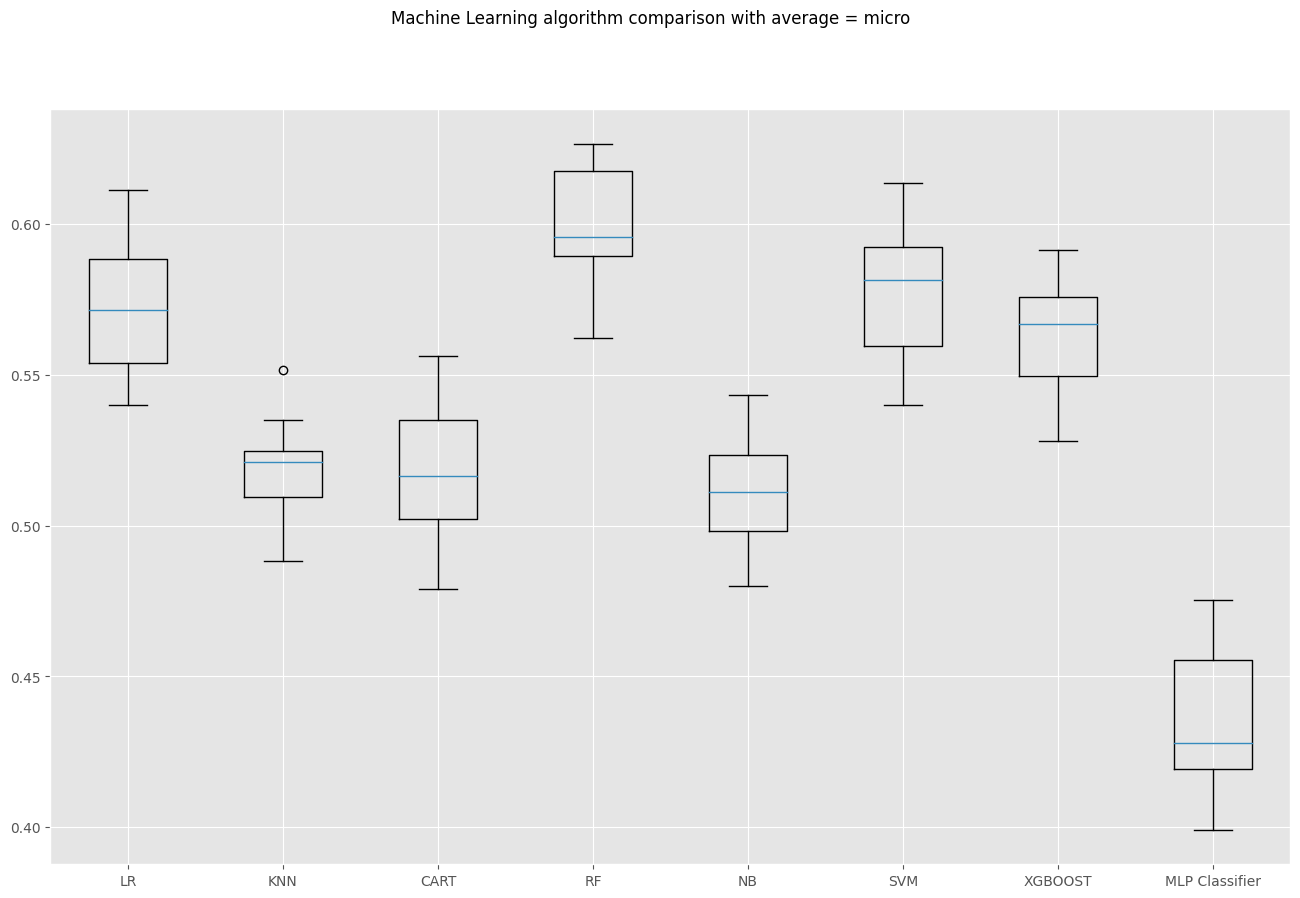

In [199]:
# with average micro
ml_algosKfold(xtrain_tfidf,xvalid_tfidf,train_y,test_y,'micro')

[STATUS] features shape: (8520, 2486)
[STATUS] labels shape: (8520,)
[STATUS] training started...
LR: 0.571948 (0.023161) f1_score 0.222059
KNN: 0.519484 (0.018017) f1_score 0.195107
CART: 0.516901 (0.024576) f1_score 0.279595
RF: 0.599178 (0.020991) f1_score 0.357854
NB: 0.511854 (0.020682) f1_score 0.088428
SVM: 0.576408 (0.022123) f1_score 0.240702
XGBOOST: 0.563615 (0.019526) f1_score 0.292431
MLP Classifier: 0.435563 (0.024729) f1_score 0.012650


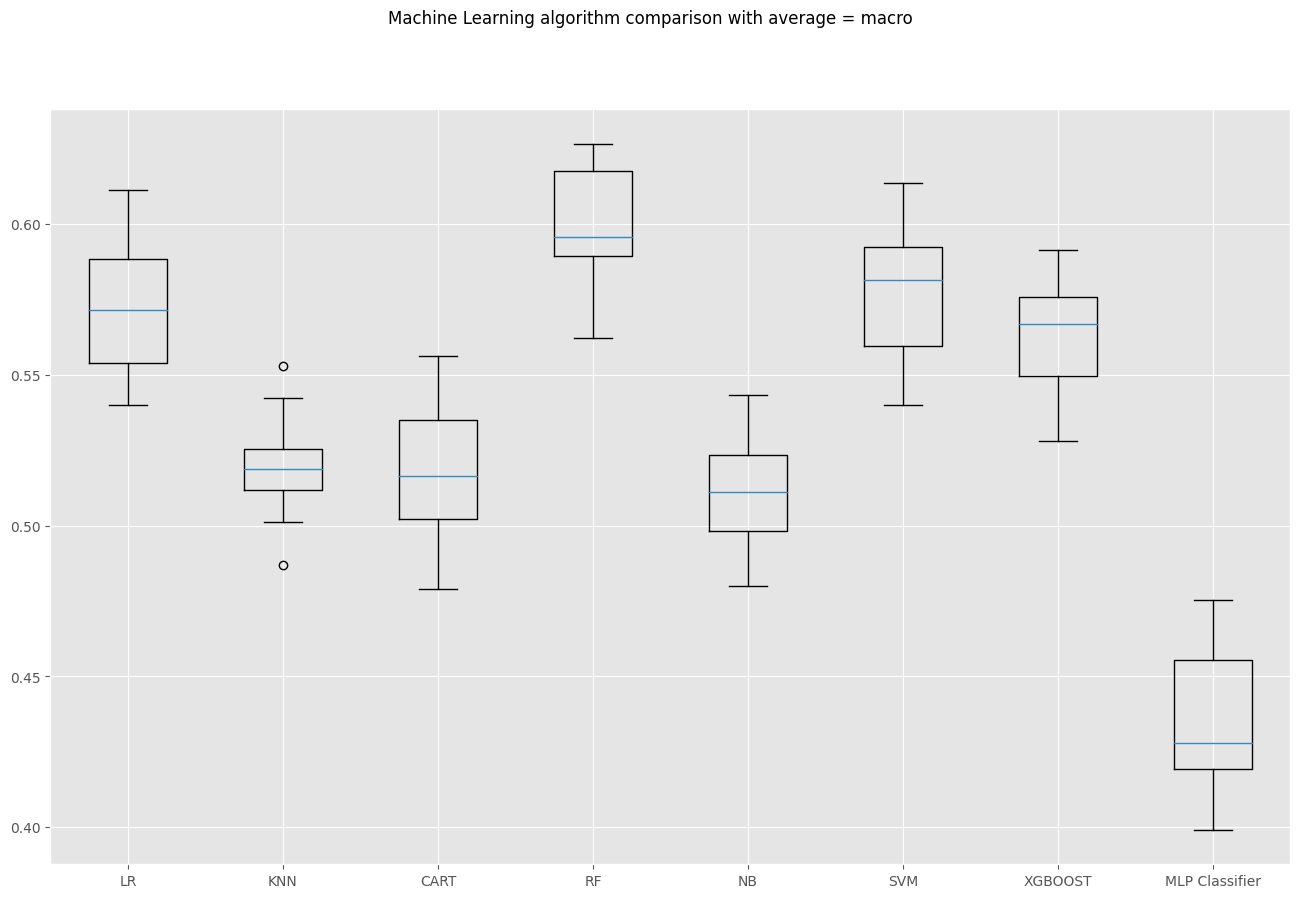

In [200]:
# with average macro
ml_algosKfold(xtrain_tfidf,xvalid_tfidf,train_y,test_y,'macro')

[STATUS] features shape: (8520, 2486)
[STATUS] labels shape: (8520,)
[STATUS] training started...
LR: 0.571948 (0.023161) f1_score 0.500848
KNN: 0.519484 (0.018017) f1_score 0.433756
CART: 0.516901 (0.024576) f1_score 0.500969
RF: 0.599178 (0.020991) f1_score 0.553427
NB: 0.511854 (0.020682) f1_score 0.390689
SVM: 0.576408 (0.022123) f1_score 0.510420
XGBOOST: 0.563615 (0.019526) f1_score 0.500723
MLP Classifier: 0.435563 (0.024729) f1_score 0.264702


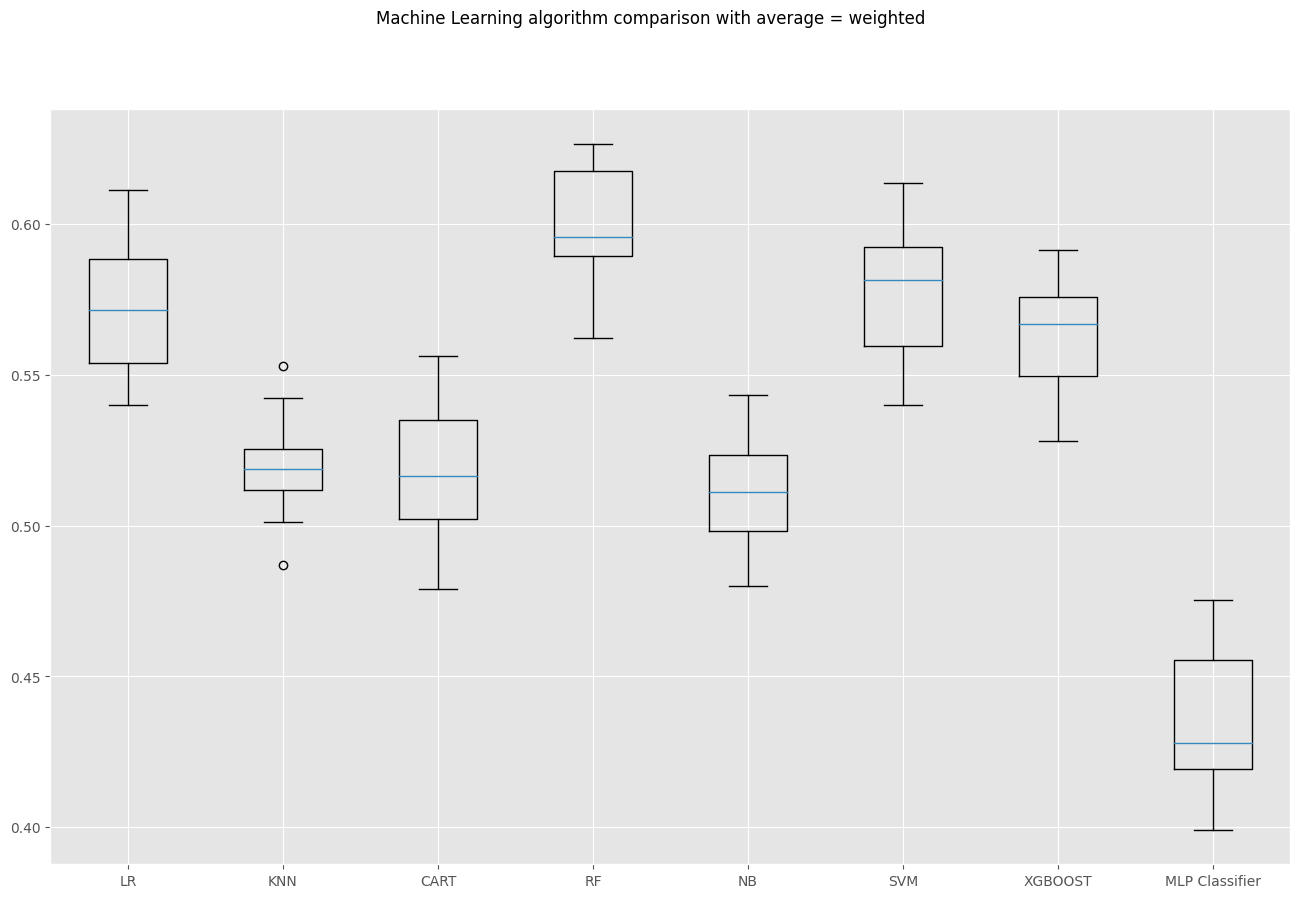

In [201]:
# with average weighted
ml_algosKfold(xtrain_tfidf,xvalid_tfidf,train_y,test_y,'weighted')

In [202]:
pos_label=list(set(test_y))
print(pos_label)

['GRP_21', 'GRP_100', 'GRP_48', 'GRP_16', 'GRP_41', 'GRP_34', 'GRP_45', 'GRP_13', 'GRP_36', 'GRP_4', 'GRP_2', 'GRP_26', 'GRP_47', 'GRP_14', 'GRP_39', 'GRP_40', 'GRP_0', 'GRP_9', 'GRP_1', 'GRP_22', 'GRP_15', 'GRP_24', 'GRP_28', 'GRP_3', 'GRP_10', 'GRP_18', 'GRP_17', 'GRP_20', 'GRP_30', 'GRP_5', 'GRP_19', 'GRP_33', 'GRP_42', 'GRP_6', 'GRP_65', 'GRP_37', 'GRP_7', 'GRP_12', 'GRP_50', 'GRP_62', 'GRP_25', 'GRP_8', 'GRP_29', 'GRP_31', 'GRP_27', 'GRP_44', 'GRP_11', 'GRP_23']


In [203]:
from sklearn.ensemble import RandomForestClassifier

rfcl = RandomForestClassifier(n_estimators=150, random_state=50, bootstrap=False)
rfcl = rfcl.fit(xtrain_tfidf, train_y)
pred_RF = rfcl.predict(xvalid_tfidf)
acc_RF = accuracy_score(test_y, pred_RF)
print("Random forest Accuracy Score {}".format(acc_RF))
#F1_score
score_test = metrics.f1_score(test_y, pred_RF, pos_label=list(set(test_y)), average = 'weighted')
#score_test = metrics.f1_score(test_y, pred_RF, average = "macro")
print(score_test.mean())

Random forest Accuracy Score 0.6180197090567808
0.5781351264859839


In [204]:
from sklearn.ensemble import RandomForestClassifier

rfcl = RandomForestClassifier(n_estimators=150, random_state=50, bootstrap=False)
rfcl = rfcl.fit(xtrain_tfidf, train_y)
pred_RF = rfcl.predict(xvalid_tfidf)
acc_RF = accuracy_score(test_y, pred_RF)
print("Random forest Accuracy Score {}".format(acc_RF))
#F1_score
score_test = metrics.f1_score(test_y, pred_RF, pos_label=list(set(test_y)), average = 'micro')
#score_test = metrics.f1_score(test_y, pred_RF, average = "macro")
print(score_test.mean())

Random forest Accuracy Score 0.6180197090567808
0.6180197090567808


##Deep Learning methods tryout

In [205]:
num_epochs = 10
batch_size=100

### 1. Traninig with ANN

Artificial Neural Networks (ANN) are multi-layer fully-connected neural nets. They consist of an input layer, multiple hidden layers, and an output layer. Every node in one layer is connected to every other node in the next layer. 

In [206]:
num_class = len(np.unique(ticket_data['Assignment group'].values))
inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(numWords,
                            128,
                            input_length=MAX_LENGTH)(inputs)
x = Flatten()(embedding_layer)
x = Dense(32, activation='relu')(x)

predictions = Dense(num_class, activation='softmax')(x)
model = Model(inputs=[inputs], outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()
filepath="weights-simple.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
model_history = model.fit([X_train], batch_size=batch_size, y=to_categorical(y_train), verbose=1, validation_split=0.2, 
          shuffle=True, epochs=num_epochs, callbacks=[checkpointer])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 300)]             0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 300, 128)          1533440   
_________________________________________________________________
flatten_1 (Flatten)          (None, 38400)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1228832   
_________________________________________________________________
dense_9 (Dense)              (None, 48)                1584      
Total params: 2,763,856
Trainable params: 2,763,856
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
69/69 [==============================] - 2s 25ms/step - loss: 3.0187 - acc: 0.3930 - val_loss: 2.6587 - 

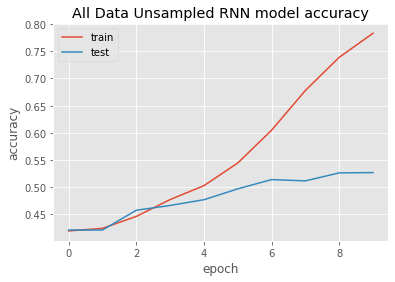

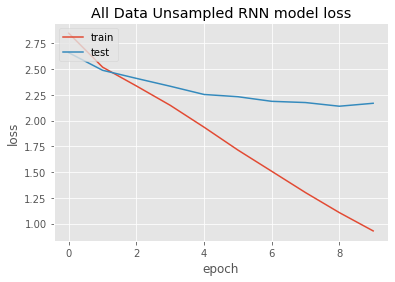

In [207]:
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])

plt.title('All Data Unsampled RNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

plt.title('All Data Unsampled RNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

###2. RNN

Recurrent neural networks (RNN) are the state of the art algorithm for sequential data. It remembers its input, due to an internal memory, which makes it perfectly suited for machine learning problems that involve sequential data. 

In [208]:
embed = Embedding(numWords+1,output_dim=50,input_length=maxlen,trainable=True)
model = Sequential()
model.add(Input(shape=(maxlen,),dtype=tf.int64))
model.add(embed)
model.add(Conv1D(100,10,activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(100,10,activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(128))) ## drop it later maybe for testing ..
model.add(Dropout(0.3))
model.add(Dense(100,activation='relu'))
model.add(Dense(grpCnt,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 300, 50)           599050    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 291, 100)          50100     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 145, 100)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 145, 100)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 136, 100)          100100    
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 68, 100)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 256)              

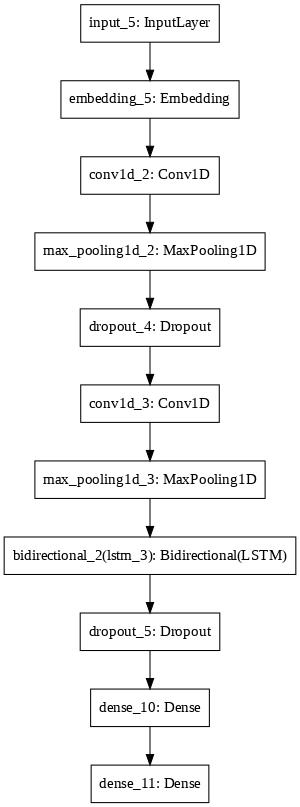

In [209]:
plot_model(model,to_file="RNN.jpg", dpi=75)

In [210]:
checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
model_history=model.fit(X_train,y_train,batch_size=batch_size, epochs=num_epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_test, y_test))

Epoch 1/10
86/86 [==============================] - 6s 36ms/step - loss: 3.0286 - accuracy: 0.4023 - val_loss: 2.7041 - val_accuracy: 0.4359

Epoch 00001: val_accuracy improved from -inf to 0.43595, saving model to model-001-0.435946.h5
Epoch 2/10
86/86 [==============================] - 2s 27ms/step - loss: 2.6367 - accuracy: 0.4311 - val_loss: 2.4421 - val_accuracy: 0.4542

Epoch 00002: val_accuracy improved from 0.43595 to 0.45425, saving model to model-002-0.454247.h5
Epoch 3/10
86/86 [==============================] - 2s 27ms/step - loss: 2.3347 - accuracy: 0.4594 - val_loss: 2.3193 - val_accuracy: 0.4664

Epoch 00003: val_accuracy improved from 0.45425 to 0.46645, saving model to model-003-0.466448.h5
Epoch 4/10
86/86 [==============================] - 2s 27ms/step - loss: 2.1108 - accuracy: 0.4916 - val_loss: 2.3285 - val_accuracy: 0.4542

Epoch 00004: val_accuracy did not improve from 0.46645
Epoch 5/10
86/86 [==============================] - 2s 27ms/step - loss: 2.0155 - accu

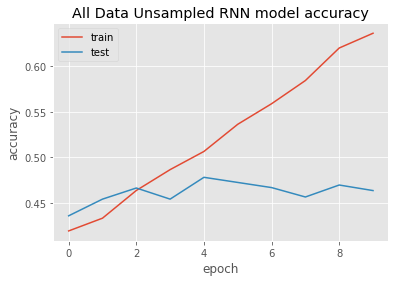

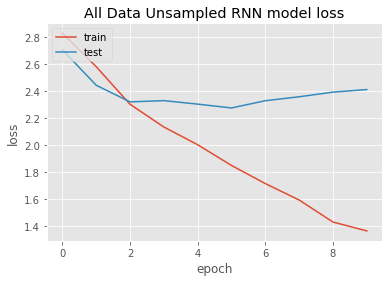

In [211]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('All Data Unsampled RNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

plt.title('All Data Unsampled RNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### 3. LSTM

Long Short-Term Memory (LSTM) networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problems.

In [212]:
MAX_LENGTH = 300

In [213]:
inputs = keras.Input(shape=(MAX_LENGTH, ), dtype="int32")

# Embed each integer in a 128-dimensional vector
x = layers.Embedding(numWords, 128)(inputs)
x = layers.Dropout(0.2)(x)

# Add 2 LSTM layers
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(64, return_sequences=False)(x)

x = layers.Dropout(0.2)(x)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(num_class, activation='softmax')(x)

In [214]:
# Add a classifier
lstm_model = keras.Model(inputs, outputs)
lstm_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 300)]             0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 300, 128)          1533440   
_________________________________________________________________
dropout_6 (Dropout)          (None, 300, 128)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 300, 64)           49408     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                2080

In [215]:
lstm_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [216]:
training_history = lstm_model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(X_test, y_test))

Epoch 1/10
86/86 [==============================] - 7s 52ms/step - loss: 3.2285 - accuracy: 0.3848 - val_loss: 2.7078 - val_accuracy: 0.4359
Epoch 2/10
86/86 [==============================] - 4s 44ms/step - loss: 2.7076 - accuracy: 0.4177 - val_loss: 2.4861 - val_accuracy: 0.4533
Epoch 3/10
86/86 [==============================] - 4s 44ms/step - loss: 2.4209 - accuracy: 0.4507 - val_loss: 2.4142 - val_accuracy: 0.4618
Epoch 4/10
86/86 [==============================] - 4s 44ms/step - loss: 2.2749 - accuracy: 0.4592 - val_loss: 2.3718 - val_accuracy: 0.4693
Epoch 5/10
86/86 [==============================] - 4s 44ms/step - loss: 2.1331 - accuracy: 0.4700 - val_loss: 2.3777 - val_accuracy: 0.4702
Epoch 6/10
86/86 [==============================] - 4s 43ms/step - loss: 2.0384 - accuracy: 0.4884 - val_loss: 2.3628 - val_accuracy: 0.4660
Epoch 7/10
86/86 [==============================] - 4s 44ms/step - loss: 1.8666 - accuracy: 0.5273 - val_loss: 2.3326 - val_accuracy: 0.4918
Epoch 8/10
86

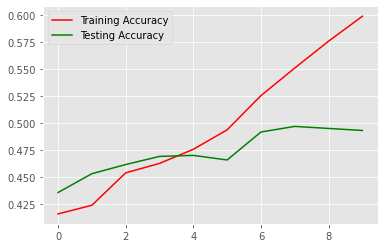

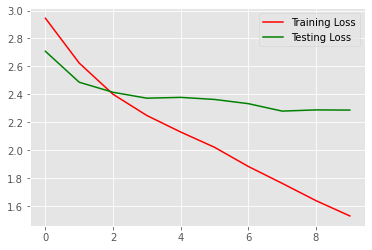

In [217]:

acc=training_history.history['accuracy']
val_acc=training_history.history['val_accuracy']
loss=training_history.history['loss']
val_loss=training_history.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()

### 4. Bidirectional GATED RECURRENT UNIT (GRU)

Gated recurrent units are a gating mechanism in recurrent neural networks. The GRU is like a long short-term memory (LSTM) with a forget gate, but has fewer parameters than LSTM, as it lacks an output gate. 

In [218]:
#Building the GRU Model
embedding_dim = 128
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(numWords, embedding_dim, input_length=MAX_LENGTH),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(16)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(num_class, activation='softmax')
])

model_gru.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 300, 128)          1533440   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 32)                14016     
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 198       
_________________________________________________________________
dense_15 (Dense)             (None, 48)                336       
Total params: 1,547,990
Trainable params: 1,547,990
Non-trainable params: 0
_________________________________________________________________


In [219]:
#model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_gru.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
num_epochs = 10
batch_size=100

In [220]:
gru_training_history = model_gru.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(X_test, y_test))


Epoch 1/10
86/86 [==============================] - 6s 47ms/step - loss: 3.8368 - accuracy: 0.0207 - val_loss: 3.6131 - val_accuracy: 0.0136
Epoch 2/10
86/86 [==============================] - 3s 39ms/step - loss: 3.3738 - accuracy: 0.1731 - val_loss: 2.6357 - val_accuracy: 0.4359
Epoch 3/10
86/86 [==============================] - 3s 39ms/step - loss: 2.5300 - accuracy: 0.4236 - val_loss: 2.5460 - val_accuracy: 0.4359
Epoch 4/10
86/86 [==============================] - 3s 39ms/step - loss: 2.4014 - accuracy: 0.4221 - val_loss: 2.5207 - val_accuracy: 0.4359
Epoch 5/10
86/86 [==============================] - 3s 40ms/step - loss: 2.2975 - accuracy: 0.4288 - val_loss: 2.5433 - val_accuracy: 0.4359
Epoch 6/10
86/86 [==============================] - 3s 39ms/step - loss: 2.2687 - accuracy: 0.4257 - val_loss: 2.5224 - val_accuracy: 0.4331
Epoch 7/10
86/86 [==============================] - 3s 39ms/step - loss: 2.2816 - accuracy: 0.4132 - val_loss: 2.5335 - val_accuracy: 0.4303
Epoch 8/10
86

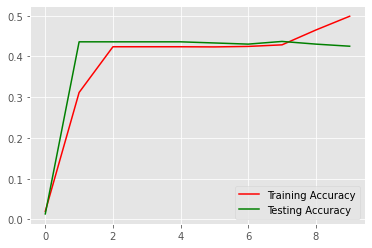

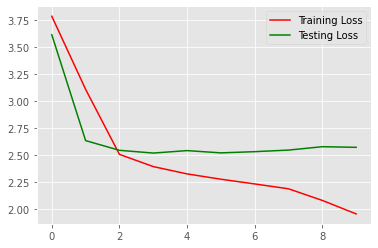

In [221]:
#Evaluating Accuracy and Loss of the model
acc=gru_training_history.history['accuracy']
val_acc=gru_training_history.history['val_accuracy']
loss=gru_training_history.history['loss']
val_loss=gru_training_history.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch

plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show() 

# Other Approaches : Resampling of the data

## Undersampling

Undersampling refers to a group of techniques designed to balance the class distribution for a classification dataset that has a skewed class distribution.

### ML

In [222]:
# Under-Sampling TomekLinks
tl = TomekLinks()
tl_xtrain_tfidf, tl_train_y = tl.fit_sample(xtrain_tfidf, train_y)

[STATUS] features shape: (7951, 2486)
[STATUS] labels shape: (7951,)
[STATUS] training started...
LR: 0.583828 (0.024097) f1_score 0.570155
KNN: 0.529495 (0.016925) f1_score 0.521351
CART: 0.533772 (0.020100) f1_score 0.531206
RF: 0.615399 (0.021860) f1_score 0.595964
NB: 0.520689 (0.020993) f1_score 0.517597
SVM: 0.590242 (0.018981) f1_score 0.583294
XGBOOST: 0.575654 (0.018989) f1_score 0.564993
MLP Classifier: 0.436673 (0.025223) f1_score 0.429845


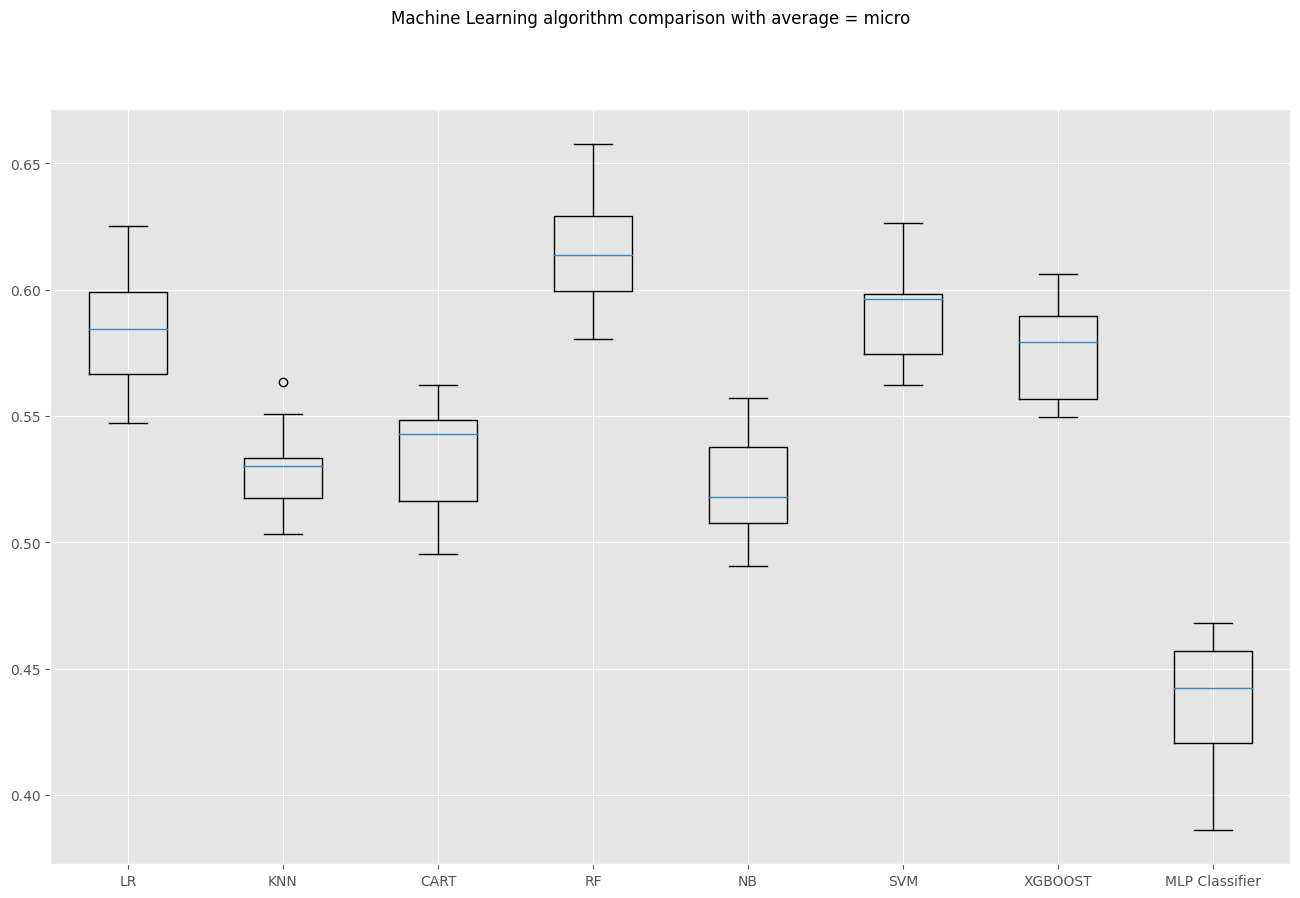

In [223]:
ml_algosKfold(tl_xtrain_tfidf,xvalid_tfidf,tl_train_y,test_y,'micro')

[STATUS] features shape: (7951, 2486)
[STATUS] labels shape: (7951,)
[STATUS] training started...
LR: 0.583828 (0.024097) f1_score 0.570155
KNN: 0.529495 (0.016925) f1_score 0.521351
CART: 0.533772 (0.020100) f1_score 0.531206
RF: 0.615399 (0.021860) f1_score 0.595964
NB: 0.520689 (0.020993) f1_score 0.517597
SVM: 0.590242 (0.018981) f1_score 0.583294
XGBOOST: 0.575654 (0.018989) f1_score 0.564993
MLP Classifier: 0.436673 (0.025223) f1_score 0.429845


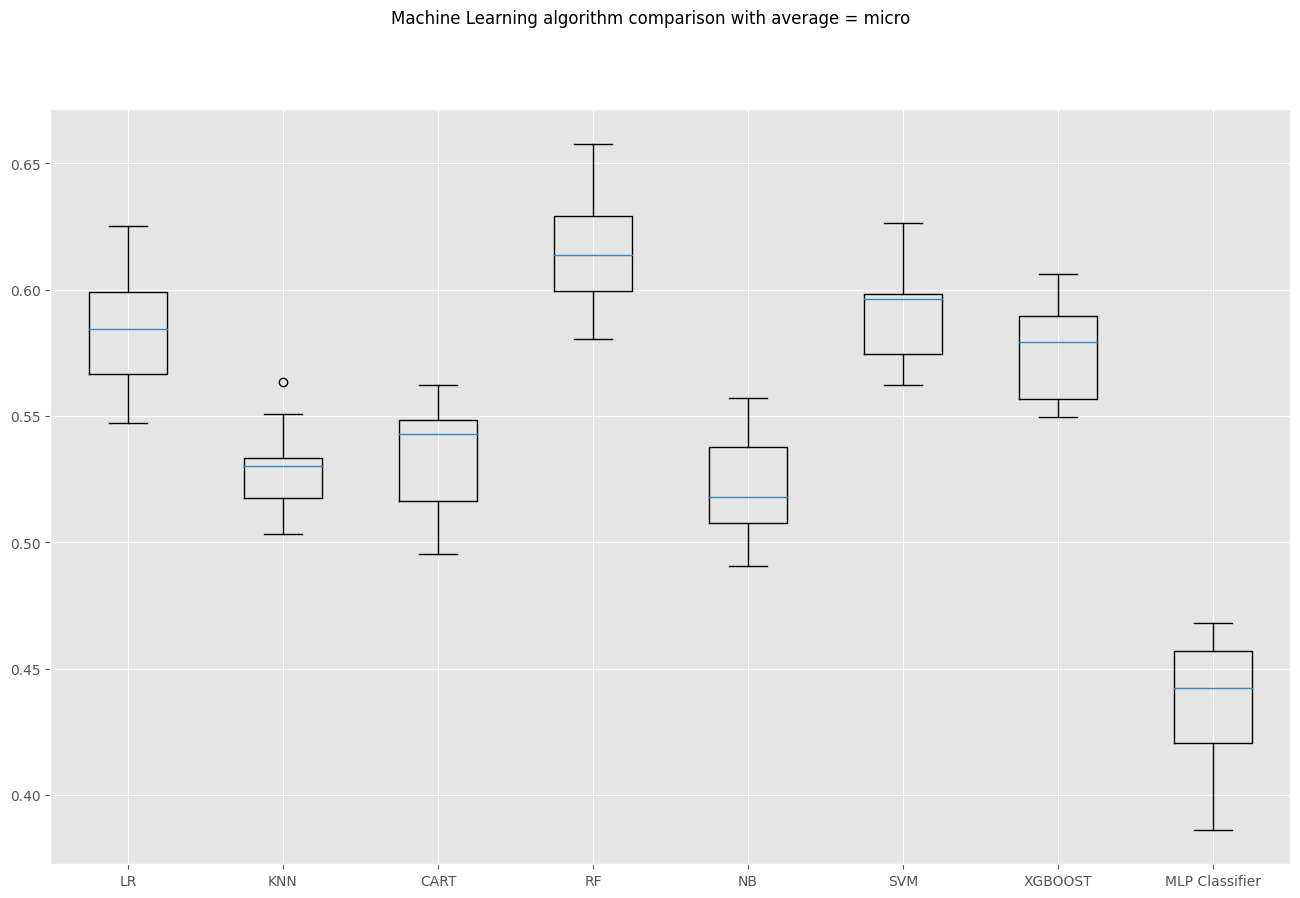

In [224]:
ml_algosKfold(tl_xtrain_tfidf,xvalid_tfidf,tl_train_y,test_y,'micro')

SMOTE stands for Synthetic Minority Oversampling Technique. This is a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases that you supply as input. This implementation of SMOTE does not change the number of majority cases.

## Oversampling

### Deep Learning methods with SMOTE for training data and RandomOverSampler for test data





In [225]:
grpBy_count = union.groupby(['Assignment group']).size().sort_values(ascending=False)
grpBy_count.head(30)

Assignment group
GRP_0     4540
GRP_8      421
GRP_12     415
GRP_2      415
GRP_19     378
GRP_24     319
GRP_3      295
GRP_13     271
GRP_25     209
GRP_14     197
GRP_33     186
GRP_29     182
GRP_4      169
GRP_16     161
GRP_18     159
GRP_10     149
GRP_6      144
GRP_9      140
GRP_7      125
GRP_34     104
GRP_31     101
GRP_26      97
GRP_40      89
GRP_17      83
GRP_41      77
GRP_5       74
GRP_15      71
GRP_20      65
GRP_42      65
GRP_28      63
dtype: int64

In [226]:
grpBy_count.tail(30)

Assignment group
GRP_50    26
GRP_65    21
GRP_36    21
GRP_53    20
GRP_52    18
GRP_51    15
GRP_60    15
GRP_55    14
GRP_46    12
GRP_49    12
GRP_59    11
GRP_43    10
GRP_32     8
GRP_38     6
GRP_68     6
GRP_58     6
GRP_66     6
GRP_63     5
GRP_56     5
GRP_69     4
GRP_54     4
GRP_71     4
GRP_35     2
GRP_67     2
GRP_70     2
GRP_72     2
GRP_57     2
GRP_73     2
GRP_64     2
GRP_61     1
dtype: int64

In [227]:
counts = union['Assignment group'].value_counts()
new_union = union.loc[union['Assignment group'].isin(counts.index[counts > 10])]
new_union.tail(20)

,EngDescription,Assignment group,Assignment group Number,tokenized
10631,customer group enhanced field,GRP_9,9,"[customer, group, enhanced, field]"
10632,es portal,GRP_9,9,"[es, portal]"
10633,robot hostname inactive,GRP_8,8,"[robot, hostname, inactive]"
10634,fw case id ref others,GRP_0,0,"[fw, case, id, ref, others]"
10635,please remove user hugcadrn ixhlwdgt ralfteimp...,GRP_2,2,"[please, remove, user, hugcadrn, ixhlwdgt, ral..."
10636,ticket update inc user hbmwlprq ilfvyodx,GRP_0,0,"[ticket, update, inc, user, hbmwlprq, ilfvyodx]"
10637,ticket update no,GRP_0,0,"[ticket, update, no]"
10638,telephony software missing pc,GRP_3,3,"[telephony, software, missing, pc]"
10639,erp account unlock,GRP_0,0,"[erp, account, unlock]"
10640,account locked,GRP_0,0,"[account, locked]"


In [228]:
new_union.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10572 entries, 0 to 10650
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EngDescription           10572 non-null  object
 1   Assignment group         10572 non-null  object
 2   Assignment group Number  10572 non-null  int64 
 3   tokenized                10572 non-null  object
dtypes: int64(1), object(3)
memory usage: 413.0+ KB


In [229]:
grpBy_Newcount = new_union.groupby(['Assignment group']).size().sort_values(ascending=False)
grpBy_Newcount.head(30)

Assignment group
GRP_0     4540
GRP_8      421
GRP_12     415
GRP_2      415
GRP_19     378
GRP_24     319
GRP_3      295
GRP_13     271
GRP_25     209
GRP_14     197
GRP_33     186
GRP_29     182
GRP_4      169
GRP_16     161
GRP_18     159
GRP_10     149
GRP_6      144
GRP_9      140
GRP_7      125
GRP_34     104
GRP_31     101
GRP_26      97
GRP_40      89
GRP_17      83
GRP_41      77
GRP_5       74
GRP_15      71
GRP_42      65
GRP_20      65
GRP_28      63
dtype: int64

In [230]:
grpBy_Newcount.tail(30)
union = new_union

union.shape

(10572, 4)

In [231]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(union['EngDescription'], union['Assignment group'], test_size=0.2, random_state=42)
train_x.head()

4946        pricing availability look dynamic crm working
337     hi team kindly please assist check plant encou...
1622    computer system start blue screen water accide...
8012    reset password yolktfas fyoxqgvh using managem...
796     rolcgqhx ehndjmlv sent tuesday october communi...
Name: EngDescription, dtype: object

In [232]:
train_y.head()

4946    GRP_40
337      GRP_0
1622    GRP_31
8012    GRP_17
796     GRP_26
Name: Assignment group, dtype: object

In [233]:
encoder = preprocessing.LabelEncoder()
train_y_encoder = encoder.fit_transform(train_y)
test_y_encoder = encoder.fit_transform(test_y)

In [234]:
tfidf_vect = TfidfVectorizer(min_df=5 ,use_idf=True,analyzer='word', token_pattern=r'\w{1,}')
tfidf_vect.fit(union['EngDescription'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(test_x)

In [235]:
maxlen = 300
grpCnt = len(union['Assignment group'].unique())

In [236]:
tokenizer = Tokenizer(num_words=numWords ,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
tokenizer.fit_on_texts(union['tokenized'])

In [237]:
X_train = tokenizer.texts_to_sequences(train_x)
X_train = pad_sequences(X_train, maxlen = maxlen)

X_test  = tokenizer.texts_to_sequences(test_x)
X_test = pad_sequences(X_test, maxlen = maxlen)

In [238]:
y_train = train_y_encoder
y_test  = test_y_encoder

In [239]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority' )

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_train, y_train)


X_train = x_smote
y_train = y_smote


In [240]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X_test, y_test)


X_test = X_ros
y_test = y_ros

In [241]:
num_class = len(np.unique(union['Assignment group'].values))
MAX_LENGTH =300

### 1. Traninig with ANN

In [242]:
num_class = len(np.unique(union['Assignment group'].values))
inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(numWords,
                            128,
                            input_length=MAX_LENGTH)(inputs)
x = Flatten()(embedding_layer)
x = Dense(32, activation='relu')(x)

predictions = Dense(num_class, activation='softmax')(x)
model = Model(inputs=[inputs], outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()
filepath="weights-simple.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
model_history = model.fit([X_train], batch_size=batch_size, y=to_categorical(y_train), verbose=1, validation_split=0.2, 
          shuffle=True, epochs=num_epochs, callbacks=[checkpointer])

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 300)]             0         
_________________________________________________________________
embedding_8 (Embedding)      (None, 300, 128)          1533440   
_________________________________________________________________
flatten_2 (Flatten)          (None, 38400)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)                1228832   
_________________________________________________________________
dense_17 (Dense)             (None, 55)                1815      
Total params: 2,764,087
Trainable params: 2,764,087
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
97/97 [==============================] - 3s 23ms/step - loss: 3.2505 - acc: 0.3286 - val_loss: 2.0700 - 

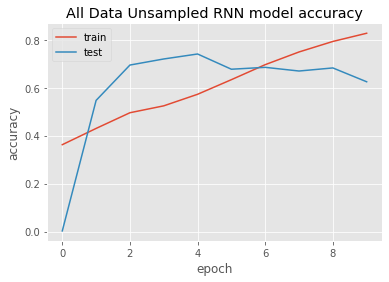

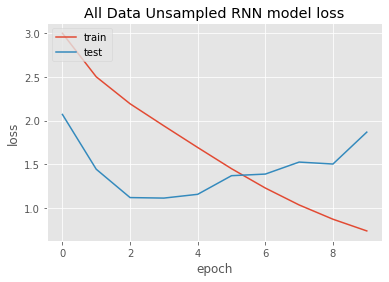

In [243]:
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])

plt.title('All Data Unsampled RNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

plt.title('All Data Unsampled RNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### 2. RNN

In [244]:
embed = Embedding(numWords+1,output_dim=50,input_length=maxlen,trainable=True)
model = Sequential()
model.add(Input(shape=(maxlen,),dtype=tf.int64))
model.add(embed)
model.add(Conv1D(100,10,activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(100,10,activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(128))) ## drop it later maybe for testing ..
model.add(Dropout(0.3))
model.add(Dense(100,activation='relu'))
model.add(Dense(grpCnt,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 300, 50)           599050    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 291, 100)          50100     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 145, 100)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 145, 100)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 136, 100)          100100    
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 68, 100)           0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 256)              

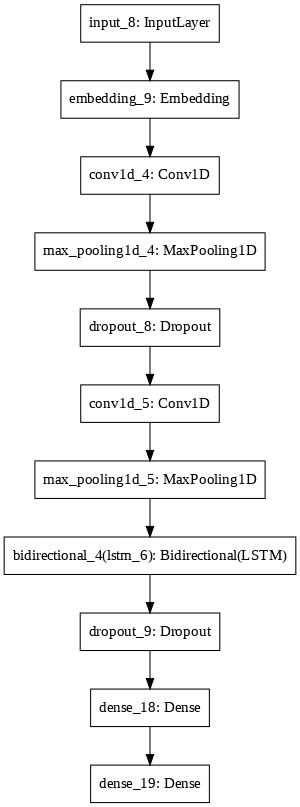

In [245]:
plot_model(model,to_file="RNN.jpg", dpi=75)

In [246]:
checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
model_history=model.fit(X_train,y_train,batch_size=batch_size, epochs=num_epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_test, y_test))

Epoch 1/10
121/121 [==============================] - 11s 70ms/step - loss: 2.8128 - accuracy: 0.2981 - val_loss: 5.0499 - val_accuracy: 0.0132

Epoch 00001: val_accuracy improved from -inf to 0.01317, saving model to model-001-0.013172.h5
Epoch 2/10
121/121 [==============================] - 7s 62ms/step - loss: 2.3525 - accuracy: 0.3617 - val_loss: 4.8290 - val_accuracy: 0.0251

Epoch 00002: val_accuracy improved from 0.01317 to 0.02507, saving model to model-002-0.025066.h5
Epoch 3/10
121/121 [==============================] - 8s 63ms/step - loss: 2.0320 - accuracy: 0.4786 - val_loss: 4.8086 - val_accuracy: 0.0319

Epoch 00003: val_accuracy improved from 0.02507 to 0.03190, saving model to model-003-0.031904.h5
Epoch 4/10
121/121 [==============================] - 8s 62ms/step - loss: 1.7272 - accuracy: 0.5844 - val_loss: 4.7684 - val_accuracy: 0.0367

Epoch 00004: val_accuracy improved from 0.03190 to 0.03673, saving model to model-004-0.036727.h5
Epoch 5/10
121/121 [==============

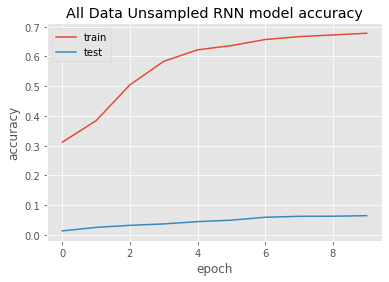

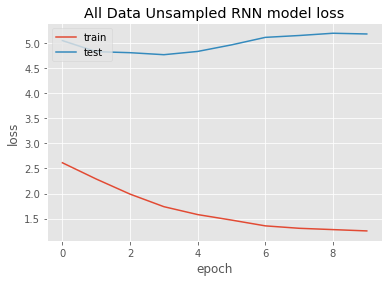

In [247]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('All Data Unsampled RNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

plt.title('All Data Unsampled RNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### 3. LSTM

In [248]:
MAX_LENGTH = 300

In [249]:
inputs = keras.Input(shape=(MAX_LENGTH, ), dtype="int32")

# Embed each integer in a 128-dimensional vector
x = layers.Embedding(numWords, 128)(inputs)
x = layers.Dropout(0.2)(x)

# Add 2 LSTM layers
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(64, return_sequences=False)(x)

x = layers.Dropout(0.2)(x)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(num_class, activation='softmax')(x)

In [250]:
# Add a classifier
lstm_model = keras.Model(inputs, outputs)
lstm_model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 300)]             0         
_________________________________________________________________
embedding_10 (Embedding)     (None, 300, 128)          1533440   
_________________________________________________________________
dropout_10 (Dropout)         (None, 300, 128)          0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 300, 64)           49408     
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 32)                2080

In [251]:
lstm_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [252]:
training_history = lstm_model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(X_test, y_test))

Epoch 1/10
121/121 [==============================] - 14s 97ms/step - loss: 3.1337 - accuracy: 0.2881 - val_loss: 5.1414 - val_accuracy: 0.0185
Epoch 2/10
121/121 [==============================] - 11s 91ms/step - loss: 2.5614 - accuracy: 0.3043 - val_loss: 5.0857 - val_accuracy: 0.0278
Epoch 3/10
121/121 [==============================] - 11s 91ms/step - loss: 2.3938 - accuracy: 0.3892 - val_loss: 4.7685 - val_accuracy: 0.0282
Epoch 4/10
121/121 [==============================] - 11s 91ms/step - loss: 2.0591 - accuracy: 0.5155 - val_loss: 4.7870 - val_accuracy: 0.0312
Epoch 5/10
121/121 [==============================] - 11s 91ms/step - loss: 1.8626 - accuracy: 0.5655 - val_loss: 5.1298 - val_accuracy: 0.0295
Epoch 6/10
121/121 [==============================] - 11s 91ms/step - loss: 1.7128 - accuracy: 0.5882 - val_loss: 5.0546 - val_accuracy: 0.0350
Epoch 7/10
121/121 [==============================] - 11s 91ms/step - loss: 1.6064 - accuracy: 0.6075 - val_loss: 5.0970 - val_accuracy:

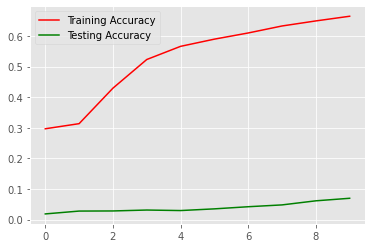

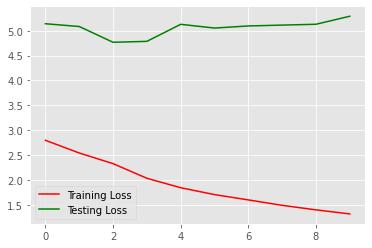

In [253]:

acc=training_history.history['accuracy']
val_acc=training_history.history['val_accuracy']
loss=training_history.history['loss']
val_loss=training_history.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()

### 4. Bidirectional GATED RECURRENT UNIT (GRU)

In [254]:
#Building the GRU Model
embedding_dim = 128
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(numWords, embedding_dim, input_length=MAX_LENGTH),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(16)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(num_class, activation='softmax')
])

model_gru.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 300, 128)          1533440   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 32)                14016     
_________________________________________________________________
dense_22 (Dense)             (None, 6)                 198       
_________________________________________________________________
dense_23 (Dense)             (None, 55)                385       
Total params: 1,548,039
Trainable params: 1,548,039
Non-trainable params: 0
_________________________________________________________________


In [255]:
#model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_gru.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
num_epochs = 10
batch_size=100

In [256]:
gru_training_history = model_gru.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(X_test, y_test))


Epoch 1/10
121/121 [==============================] - 14s 96ms/step - loss: 3.6865 - accuracy: 0.1476 - val_loss: 4.8448 - val_accuracy: 0.0185
Epoch 2/10
121/121 [==============================] - 10s 85ms/step - loss: 2.5680 - accuracy: 0.2975 - val_loss: 4.9452 - val_accuracy: 0.0214
Epoch 3/10
121/121 [==============================] - 10s 85ms/step - loss: 2.2622 - accuracy: 0.3333 - val_loss: 5.0232 - val_accuracy: 0.0306
Epoch 4/10
121/121 [==============================] - 10s 85ms/step - loss: 2.0868 - accuracy: 0.4453 - val_loss: 5.0127 - val_accuracy: 0.0287
Epoch 5/10
121/121 [==============================] - 10s 85ms/step - loss: 1.9106 - accuracy: 0.5172 - val_loss: 4.9277 - val_accuracy: 0.0256
Epoch 6/10
121/121 [==============================] - 10s 85ms/step - loss: 1.7315 - accuracy: 0.5520 - val_loss: 5.0029 - val_accuracy: 0.0285
Epoch 7/10
121/121 [==============================] - 10s 86ms/step - loss: 1.6048 - accuracy: 0.5768 - val_loss: 5.3649 - val_accuracy:

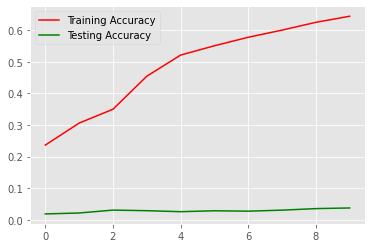

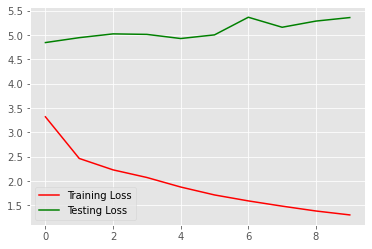

In [257]:
#Evaluating Accuracy and Loss of the model
acc=gru_training_history.history['accuracy']
val_acc=gru_training_history.history['val_accuracy']
loss=gru_training_history.history['loss']
val_loss=gru_training_history.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch

plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show() 

### ML

Random oversampling involves randomly duplicating  examples from the minority class and adding them to the training dataset.

In [260]:
#Random Over Sampling
ros = RandomOverSampler(random_state=777)
ros_xtrain_tfidf, ros_train_y = ros.fit_sample(xtrain_tfidf, train_y)

[STATUS] features shape: (267214, 2486)
[STATUS] labels shape: (267214,)
[STATUS] training started...
LR: 0.153292 (0.062137) f1_score 0.503050
KNN: 0.275464 (0.064927) f1_score 0.382450
CART: 0.853317 (0.227660) f1_score 0.454247
RF: 0.854792 (0.228145) f1_score 0.599249
NB: 0.101088 (0.050718) f1_score 0.442515
SVM: 0.455668 (0.155259) f1_score 0.610981
XGBOOST: 0.489280 (0.138707) f1_score 0.406851
MLP Classifier: 0.007649 (0.022552) f1_score 0.000000


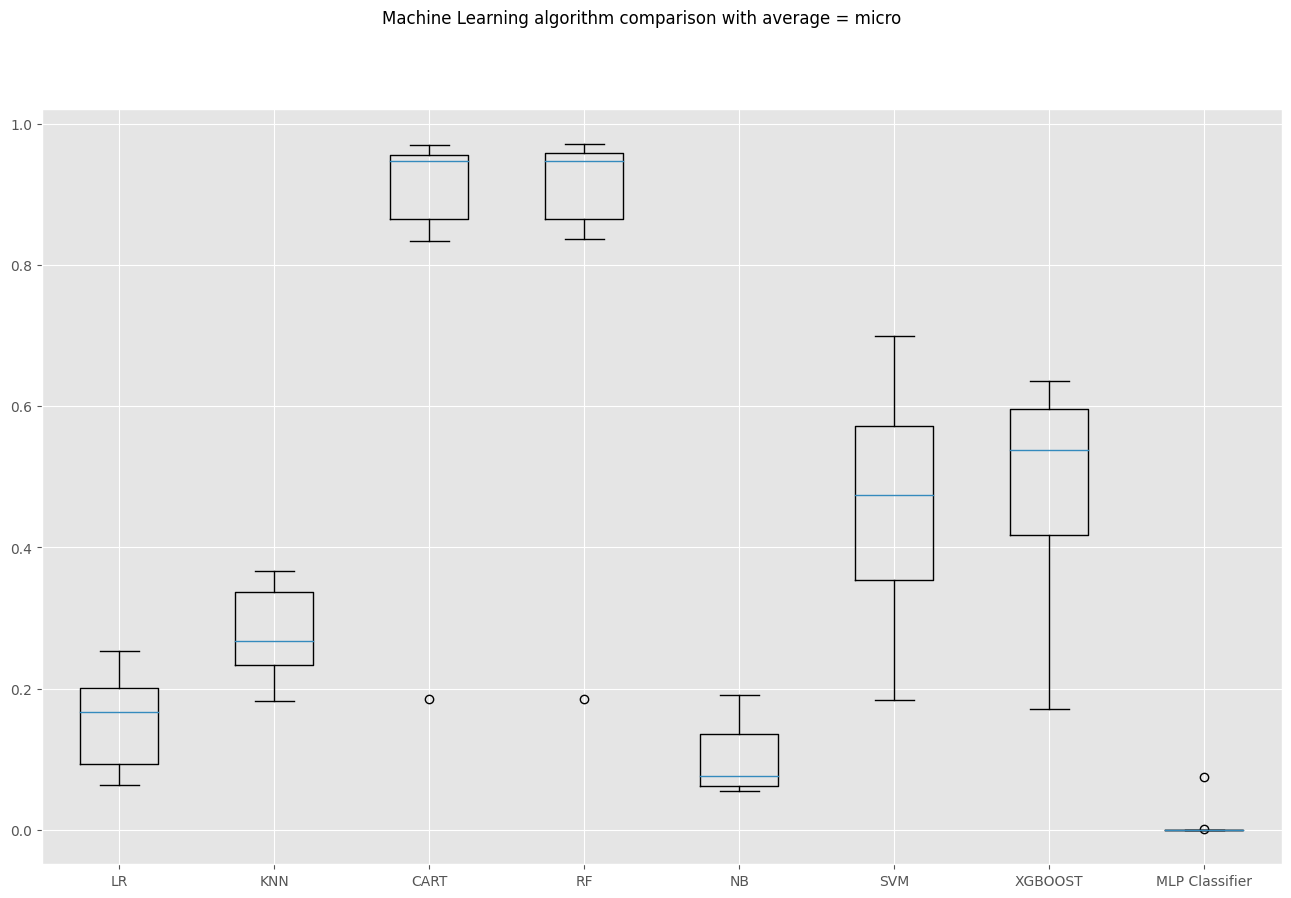

In [ ]:
ml_algosKfold(ros_xtrain_tfidf,xvalid_tfidf,ros_train_y,test_y,'micro')